In [9]:
# Load the data
import sys
sys.path.append('/workspace/fourth_year_project/Freqency Domain/')
from SpectroDataset import SpectroDataset
sp = SpectroDataset(None, None, None)
sp.load_data_map('/workspace/extension/fancy.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/extension/fancy.pkl'

In [ ]:
from Autoencoder import AutoEncoder
num_channels = 2

model = AutoEncoder(input_channels=num_channels, out_channels=num_channels).cuda()

In [ ]:
import torch
checkpoint = torch.load('/workspace/extension/unet/model_checkpoints/model_0.pt')

In [ ]:
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [ ]:
model.eval()
''

''

In [ ]:
single_element = sp[0]

In [ ]:
mono, label, right, left = single_element
orig = mono
label

'90'

In [ ]:
# Conver to tensor
mono = torch.from_numpy(mono).cuda()
mono.shape

torch.Size([401, 501])

In [ ]:
mono = mono.unsqueeze(0)
mono.shape

torch.Size([1, 401, 501])

In [ ]:
mono = torch.view_as_real(mono)
mono.shape

torch.Size([1, 401, 501, 2])

In [ ]:
# Convert label to tuple
label = '90'
label = (float(label),)
print(label)
print(type(label))

(90.0,)
<class 'tuple'>


In [ ]:
# Generate from model
print(type(mono))

output = model(mono, label)
output = output.contiguous()

<class 'torch.Tensor'>


In [ ]:
output.shape

torch.Size([1, 400, 500, 2])

In [ ]:
output = output.squeeze(0)
output.shape

torch.Size([400, 500, 2])

In [ ]:
output = torch.view_as_complex(output)
output.shape

torch.Size([400, 500])

In [ ]:
import librosa
import numpy as np

In [ ]:
# Show first five lines of output
print(output[0:5, 0])

tensor([0.0051+0.0050j, 0.0062-0.0010j, 0.0051+0.0004j, 0.0052-0.0002j,
        0.0050+0.0005j], device='cuda:0', grad_fn=<SelectBackward0>)


In [ ]:
output = output.cpu().detach().numpy()

In [ ]:
print(output[0:5, 0])

[0.00513587+0.00499523j 0.0062129 -0.00099212j 0.00510491+0.00043606j
 0.00523037-0.00016533j 0.00502612+0.00053716j]


/tmp/ipykernel_1029/248800207.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(output, sr=32000, x_axis='time', y_axis='log')


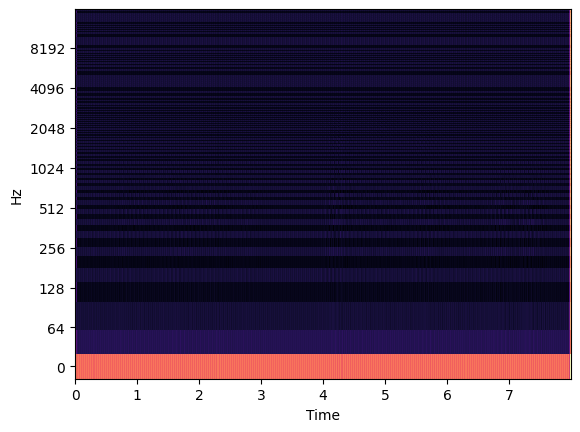

In [ ]:
librosa.display.specshow(output, sr=32000, x_axis='time', y_axis='log')

In [ ]:
print(orig[0:5, 0])

[ 0.00934297+0.j         -0.01030917+0.01676712j  0.01284514-0.05477672j
  0.04071074+0.10329349j -0.11926603-0.09469341j]


In [ ]:
print(right[0:5, 0])

[-0.00735782+0.j         -0.05492159-0.04122766j  0.09160624-0.04045342j
 -0.02968136+0.04956819j  0.12423372-0.04524084j]


In [ ]:
# Load the data
import sys
sys.path.append('/workspace/fourth_year_project/Freqency Domain/')
from SpectroDataset import SpectroDataset
sp = SpectroDataset(None, None, None)
sp.load_data_map('/workspace/extension/fancy_tiny.pkl')

In [ ]:
mono, label, right, left, orig = sp[0]

torch.Size([2, 400, 500])
tensor([ 9.3430e-03,  9.6695e-02, -1.1209e-01,  7.9235e-02, -6.3714e-02,
         8.2019e-02,  7.9061e-03, -8.2960e-02,  1.4944e-01, -1.3018e-03,
        -1.3215e-01,  2.1295e-01, -1.1224e-01, -9.7537e-03,  2.7107e-02,
         2.2907e-02, -6.6175e-02, -7.4377e-03,  7.3548e-02, -1.2367e-01,
        -5.4419e-02,  1.3626e-01, -9.3980e-02, -1.1310e-01,  2.1687e-02,
         2.3236e-01, -1.2582e-01,  2.1611e-02,  9.5033e-02, -1.8006e-01,
         1.1159e-01, -6.6512e-02,  2.9001e-02, -8.8402e-02,  1.5624e-02,
        -4.5757e-02,  9.6033e-02, -1.0769e-01, -9.2236e-03,  1.4559e-01,
        -1.0243e-01, -2.3499e-02,  1.1875e-01, -5.0736e-02, -8.0629e-02,
         5.8349e-02, -1.3923e-01, -1.8614e-02, -1.5531e-01,  6.3947e-02,
        -4.0949e-03, -2.6289e-02,  4.8118e-02,  7.9210e-02,  6.5579e-02,
        -6.7279e-02,  2.2847e-02, -1.0813e-03,  1.9815e-03, -6.9354e-02,
         1.7477e-01, -1.2756e-01,  1.3304e-01,  1.3403e-01, -4.0671e-01,
         1.0693e-01,  2.1

/tmp/ipykernel_3543/2975103317.py:10: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(mono, sr=32000, x_axis='time', y_axis='log')


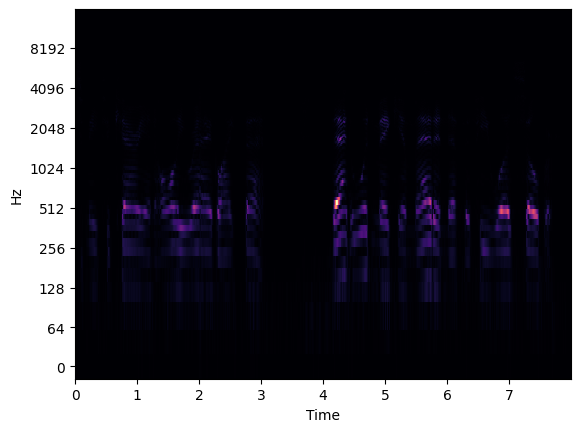

In [ ]:
import librosa
print(mono.shape)
print(orig[0,0,:])
mono = mono.permute(1, 2, 0)
print(mono.shape)
mono = torch.view_as_complex(mono)
print(mono.shape)
mono = mono.detach().cpu().numpy()
print(mono.shape)
librosa.display.specshow(mono, sr=32000, x_axis='time', y_axis='log')

torch.Size([2, 400, 500])
torch.Size([400, 500, 2])
tensor([[ 9.3430e-03+0.0000e+00j,  9.6695e-02+0.0000e+00j,
         -1.1209e-01+0.0000e+00j,  ...,
          3.2433e-02+0.0000e+00j, -4.8055e-02+0.0000e+00j,
          2.7414e-02+0.0000e+00j],
        [-1.0309e-02+1.6767e-02j, -5.4768e-02+5.2141e-02j,
          1.6995e-01-8.7709e-02j,  ...,
         -8.0891e-02+5.5176e-02j,  1.9513e-01+7.1022e-02j,
         -3.3155e-02-2.5215e-01j],
        [ 1.2845e-02-5.4777e-02j,  3.2764e-02-6.0912e-02j,
         -2.5722e-01+2.1599e-01j,  ...,
         -4.3040e-02-1.2669e-01j, -2.5131e-01-1.0678e-01j,
          1.5582e-01+4.1413e-01j],
        ...,
        [-1.7020e-04+6.1834e-05j,  1.7086e-06+1.1175e-05j,
          1.5068e-07-1.0311e-07j,  ...,
         -9.1045e-08+1.7433e-08j,  8.3170e-09+5.1639e-08j,
          9.5374e-06+3.5091e-05j],
        [ 1.7195e-04-4.0748e-05j,  6.5481e-06+8.9434e-06j,
          3.0770e-08+6.3710e-08j,  ...,
          1.7328e-08+7.9968e-09j,  2.1490e-09+2.5453e-09j,
     

/tmp/ipykernel_3543/1355616593.py:15: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(orig, sr=32000, x_axis='time', y_axis='log')


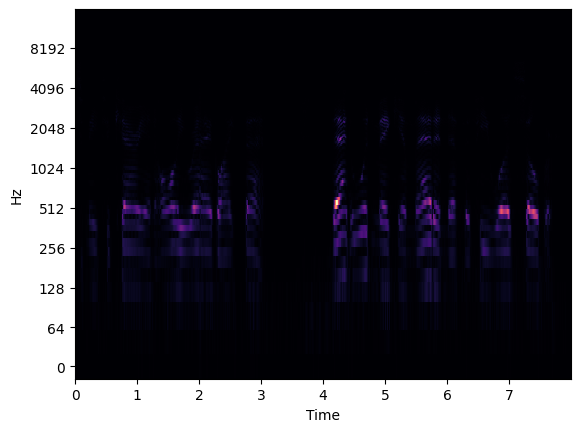

In [ ]:
import librosa
import torch
mono, label, right, left, orig = sp[0]
print(orig.shape)

orig = orig.permute(1, 2, 0)
print(orig.shape)
orig = torch.view_as_complex(orig)
print(orig)
print(orig.shape)
orig = orig.detach().cpu().numpy()
print(orig.shape)
# Convert to db
#orig = librosa.amplitude_to_db(orig)
librosa.display.specshow(orig, sr=32000, x_axis='time', y_axis='log')

In [ ]:
sp.normalize()

Done normalizing data


torch.Size([2, 400, 500])
tensor([-1.1058e-01,  2.1535e-02,  4.4822e-02, -4.8725e-03, -2.8347e-02,
        -6.6203e-04, -1.1275e-01,  7.6171e-04,  1.0131e-01, -1.2274e-01,
         7.5152e-02,  1.9735e-01,  4.5039e-02, -1.0996e-01, -8.3712e-02,
        -9.0063e-02, -2.4624e-02, -1.1346e-01, -1.3473e-02,  6.2329e-02,
        -4.2405e-02,  8.1377e-02,  1.7427e-02,  4.6342e-02, -9.1909e-02,
         2.2672e-01,  6.5579e-02, -9.2024e-02,  1.9021e-02,  1.4762e-01,
         4.4061e-02, -2.4116e-02, -8.0846e-02,  8.9918e-03, -1.0108e-01,
        -5.5504e-02,  2.0533e-02,  3.8160e-02, -1.1076e-01,  9.5479e-02,
         3.0211e-02, -8.9168e-02,  5.4897e-02, -4.7974e-02, -2.7647e-03,
        -3.6460e-02,  8.5860e-02, -9.6556e-02,  1.1018e-01, -2.7994e-02,
        -1.1851e-01, -8.4948e-02, -5.1935e-02, -4.9108e-03, -2.5526e-02,
        -2.2954e-02, -9.0154e-02, -1.2307e-01, -1.2171e-01, -1.9817e-02,
         1.3961e-01,  6.8214e-02,  7.6507e-02,  7.8007e-02,  4.9040e-01,
         3.7006e-02,  1.9

/tmp/ipykernel_3543/1580291983.py:12: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(mono, sr=32000, x_axis='time', y_axis='log')


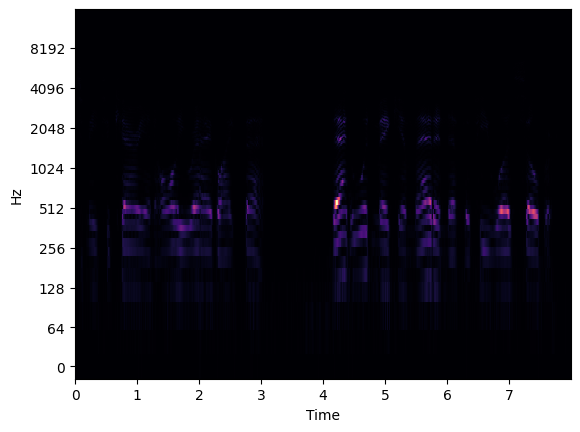

In [ ]:
import librosa
mono, label, right, left, orig = sp[0]
print(mono.shape)
# print( first row of mono)
print(mono[0, 0, :])
mono = mono.permute(1, 2, 0)
print(mono.shape)
mono = torch.view_as_complex(mono)
print(mono.shape)
mono = mono.detach().cpu().numpy()
print(mono.shape)
librosa.display.specshow(mono, sr=32000, x_axis='time', y_axis='log')

In [ ]:
print(type(mono))
print(type(sp.std_value))
print(type(sp.mean_value))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
<class 'numpy.float64'>


In [ ]:
print(mono.shape)
mono = mono.permute(1,2,0)
print(mono.shape)

torch.Size([2, 400, 500])
torch.Size([400, 500, 2])


In [ ]:
real_part = mono[:, :, 0]
imag_part = mono[:, :, 1]
print(real_part.shape)
print(imag_part.shape)

# Denormalize real and imaginary parts
denormalized_real_part = (real_part * sp.std_value.numpy()) + sp.mean_value
denormalized_imag_part = (imag_part * sp.std_value.numpy()) + sp.mean_value
print(denormalized_real_part.shape)
print(denormalized_imag_part.shape)
# Combine denormalized real and imaginary parts
back = torch.stack([denormalized_real_part, denormalized_imag_part], dim=-1)

torch.Size([400, 500])
torch.Size([400, 500])
torch.Size([400, 500])
torch.Size([400, 500])


In [ ]:
back.shape

torch.Size([400, 500, 2])

In [ ]:
back = torch.view_as_complex(back)

In [ ]:
'''
tensor([[ 9.3430e-03+0.0000e+00j,  9.6695e-02+0.0000e+00j,
         -1.1209e-01+0.0000e+00j,  ...,
          3.2433e-02+0.0000e+00j, -4.8055e-02+0.0000e+00j,
          2.7414e-02+0.0000e+00j],
        [-1.0309e-02+1.6767e-02j, -5.4768e-02+5.2141e-02j,
          1.6995e-01-8.7709e-02j,  ...,
         -8.0891e-02+5.5176e-02j,  1.9513e-01+7.1022e-02j,
         -3.3155e-02-2.5215e-01j],
        [ 1.2845e-02-5.4777e-02j,  3.2764e-02-6.0912e-02j,
         -2.5722e-01+2.1599e-01j,  ...,
         -4.3040e-02-1.2669e-01j, -2.5131e-01-1.0678e-01j,
          1.5582e-01+4.1413e-01j],
        ...,
        [-1.7020e-04+6.1834e-05j,  1.7086e-06+1.1175e-05j,
          1.5068e-07-1.0311e-07j,  ...,
         -9.1045e-08+1.7433e-08j,  8.3170e-09+5.1639e-08j,
          9.5374e-06+3.5091e-05j],
        [ 1.7195e-04-4.0748e-05j,  6.5481e-06+8.9434e-06j,
          3.0770e-08+6.3710e-08j,  ...,
          1.7328e-08+7.9968e-09j,  2.1490e-09+2.5453e-09j,
         -1.2489e-05+3.4193e-05j],
        [-1.7304e-04+2.0253e-05j,  9.6708e-06+4.9478e-06j,
          4.8005e-08+1.6947e-08j,  ...,
         -2.9789e-08-2.7820e-09j,  1.9481e-08-1.2892e-08j,
         -2.9755e-05+2.0830e-05j]])
'''

back


tensor([[9.3430e-03+0.0000e+00j, 9.6695e-02+0.0000e+00j, 1.1209e-01+0.0000e+00j,
          ..., 3.2433e-02+0.0000e+00j, 4.8055e-02+0.0000e+00j,
         2.7414e-02+0.0000e+00j],
        [1.0309e-02+1.6767e-02j, 5.4768e-02+5.2141e-02j, 1.6995e-01+8.7709e-02j,
          ..., 8.0891e-02+5.5176e-02j, 1.9513e-01+7.1022e-02j,
         3.3155e-02+2.5215e-01j],
        [1.2845e-02+5.4777e-02j, 3.2764e-02+6.0912e-02j, 2.5722e-01+2.1599e-01j,
          ..., 4.3040e-02+1.2669e-01j, 2.5131e-01+1.0678e-01j,
         1.5582e-01+4.1413e-01j],
        ...,
        [1.7020e-04+6.1832e-05j, 1.7062e-06+1.1176e-05j, 1.4901e-07+1.0431e-07j,
          ..., 8.9407e-08+1.4901e-08j, 7.4506e-09+5.2154e-08j,
         9.5367e-06+3.5092e-05j],
        [1.7195e-04+4.0747e-05j, 6.5491e-06+8.9407e-06j, 2.9802e-08+6.7055e-08j,
          ..., 1.4901e-08+7.4506e-09j, 0.0000e+00+0.0000e+00j,
         1.2487e-05+3.4191e-05j],
        [1.7303e-04+2.0251e-05j, 9.6709e-06+4.9472e-06j, 4.4703e-08+1.4901e-08j,
          ..., 2

In [ ]:
orig = torch.view_as_complex(orig)

In [ ]:
o = orig.cpu().detach().numpy()
o.shape

(400, 500)

/tmp/ipykernel_3436/772352462.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o, sr=32000, x_axis='time', y_axis='log')


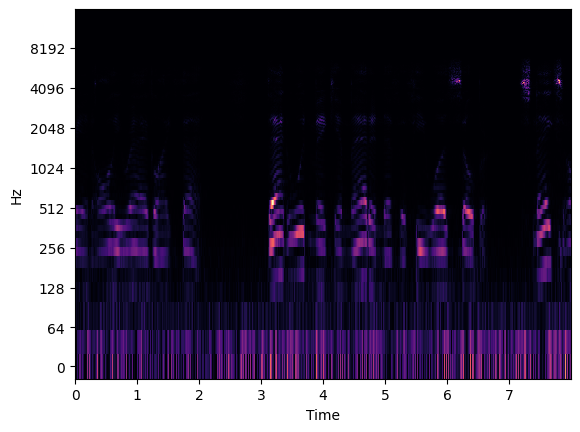

In [ ]:
import librosa
librosa.display.specshow(o, sr=32000, x_axis='time', y_axis='log')

AttributeError: 'SpectroDataset' object has no attribute 'std_value'

In [ ]:
# Testing the validity of the normalization
import sys
sys.path.append('/workspace/fourth_year_project/Freqency Domain/')
from SidedSpectroDataset import SidedSpectroDataset

In [ ]:
sp = SidedSpectroDataset('/workspace/extension/unet/freq/mono', '/workspace/extension/unet/freq/left', chunk_size=32, use_left=True)

In [ ]:
sp.normalize()

ZeroDivisionError: division by zero

In [ ]:
# Testing the validity of the normalization
import sys
sys.path.append('/workspace/fourth_year_project/Freqency Domain/')
from DatasetNormalizer import DatasetNormalizer

In [ ]:
a = '/workspace/extension/unet/freq/left/'
b = '/workspace/extension/unet/freq/right/'
c = '/workspace/extension/unet/freq/mono/'

In [ ]:
d = DatasetNormalizer([a,b,c], '/workspace/extension/unet/norm_freq')

In [ ]:
d.output_file_list[20000:20010]

['/workspace/extension/unet/norm_freq/left_105_2899.npy',
 '/workspace/extension/unet/norm_freq/left_105_2900.npy',
 '/workspace/extension/unet/norm_freq/left_105_2901.npy',
 '/workspace/extension/unet/norm_freq/left_105_2902.npy',
 '/workspace/extension/unet/norm_freq/left_105_2903.npy',
 '/workspace/extension/unet/norm_freq/left_105_2904.npy',
 '/workspace/extension/unet/norm_freq/left_105_2905.npy',
 '/workspace/extension/unet/norm_freq/left_105_2906.npy',
 '/workspace/extension/unet/norm_freq/left_105_2907.npy',
 '/workspace/extension/unet/norm_freq/left_105_2908.npy']

In [ ]:
d.file_list[20000:20010]

['/workspace/extension/unet/freq/left/left_105_2899.npy',
 '/workspace/extension/unet/freq/left/left_105_2900.npy',
 '/workspace/extension/unet/freq/left/left_105_2901.npy',
 '/workspace/extension/unet/freq/left/left_105_2902.npy',
 '/workspace/extension/unet/freq/left/left_105_2903.npy',
 '/workspace/extension/unet/freq/left/left_105_2904.npy',
 '/workspace/extension/unet/freq/left/left_105_2905.npy',
 '/workspace/extension/unet/freq/left/left_105_2906.npy',
 '/workspace/extension/unet/freq/left/left_105_2907.npy',
 '/workspace/extension/unet/freq/left/left_105_2908.npy']

In [ ]:
d.process_all_files()

RuntimeError: Parent directory /workspace/extension/unet/norm_freq/../right does not exist.

In [ ]:
print(d.global_min_imag)
print(d.global_max_imag)
print(d.global_min_real)
print(d.global_max_real)

-159.55472
160.03091
-158.56412
160.77977


In [ ]:
import sys
sys.path.append('/workspace/fourth_year_project/Freqency Domain/')
from DatasetNormalizer import DatasetNormalizer
c = '/workspace/extension/unet/freq/mono/'

d = DatasetNormalizer([c], '/workspace/extension/unet/norm_freq')

In [ ]:
d.process_all_files()

processing all
computed global min max


In [ ]:
a = '/workspace/extension/unet/norm_freq/left_30_945.npy'
b = '/workspace/extension/unet/freq/left/left_30_945.npy'

In [ ]:
import numpy as np
import torch
na = torch.load(a)
nb = np.load(b)

In [ ]:

na = na.permute(1,2,0)
na = torch.view_as_complex(na)
na.shape

torch.Size([400, 500])

/tmp/ipykernel_4889/1675604684.py:3: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(na.numpy(), sr=32000, x_axis='time', y_axis='log')


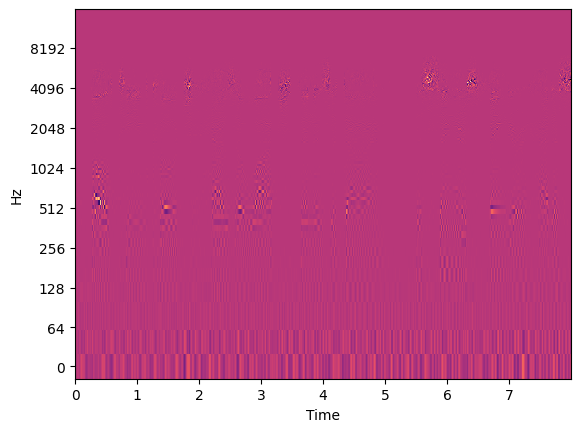

In [ ]:
# show as spectrogram
import librosa
librosa.display.specshow(na.numpy(), sr=32000, x_axis='time', y_axis='log')


/tmp/ipykernel_4889/2954169113.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(nb, sr=32000, x_axis='time', y_axis='log')


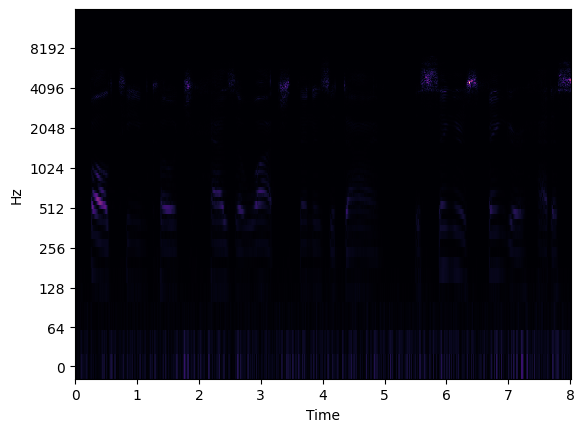

In [ ]:
librosa.display.specshow(nb, sr=32000, x_axis='time', y_axis='log')

In [ ]:
na

tensor([[[0.4957, 0.4960, 0.4977,  ..., 0.4936, 0.4949, 0.4990],
         [0.4972, 0.4966, 0.4958,  ..., 0.4984, 0.4976, 0.4945],
         [0.4962, 0.4968, 0.4969,  ..., 0.4965, 0.4965, 0.4974],
         ...,
         [0.4965, 0.4965, 0.4965,  ..., 0.4965, 0.4965, 0.4965],
         [0.4965, 0.4965, 0.4965,  ..., 0.4965, 0.4965, 0.4965],
         [0.4965, 0.4965, 0.4965,  ..., 0.4965, 0.4965, 0.4965]],

        [[0.4993, 0.4993, 0.4993,  ..., 0.4993, 0.4993, 0.4993],
         [0.4988, 0.4995, 0.5000,  ..., 0.4979, 0.5015, 0.4990],
         [0.4998, 0.4993, 0.4988,  ..., 0.4996, 0.4982, 0.4994],
         ...,
         [0.4993, 0.4993, 0.4993,  ..., 0.4993, 0.4993, 0.4992],
         [0.4993, 0.4993, 0.4993,  ..., 0.4993, 0.4993, 0.4992],
         [0.4993, 0.4993, 0.4993,  ..., 0.4993, 0.4993, 0.4992]]])

In [ ]:
#a = '/workspace/extension/unet/test/left_30_945.npy'
b = '/workspace/extension/unet/freq/left/left_0_19.npy'
import numpy as np
import torch
#na = np.load(a)
nb = np.load(b)



In [ ]:
import os
import numpy as np

# Directory containing the spectrogram files
directory = '/workspace/extension/unet/test'

# Initialize lists to store all spectrogram data
all_data = []

# Loop over all files in the directory
for filename in os.listdir(directory):
    # Check if the file is a .npy file
    if filename.endswith('.npy'):
        # Load the spectrogram data
        spectrogram = np.load(os.path.join(directory, filename))
        
        # Append the spectrogram data to the list
        all_data.append(spectrogram)

# Convert the list to a single numpy array
all_data = np.concatenate(all_data)

# Compute the global mean and standard deviation
global_mean = np.mean(all_data)
global_std = np.std(all_data)

/tmp/ipykernel_4889/1552700258.py:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(std_st, sr=32000, x_axis='time', y_axis='log')


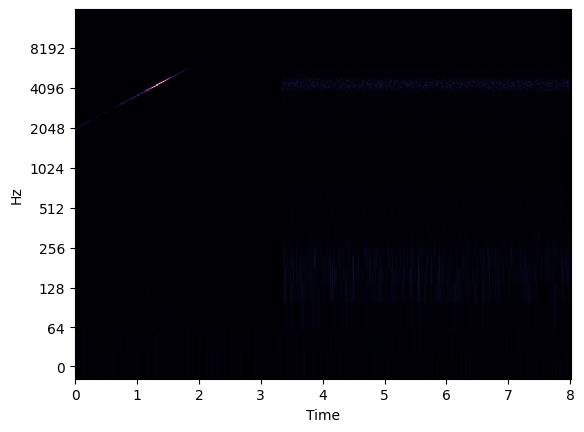

In [ ]:
t = '/workspace/extension/unet/test/left_0_19.npy'
st = np.load(t)
std_st = (st - global_mean) / global_std

librosa.display.specshow(std_st, sr=32000, x_axis='time', y_axis='log')

/tmp/ipykernel_4889/3815191200.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(nb, sr=32000, x_axis='time', y_axis='log')


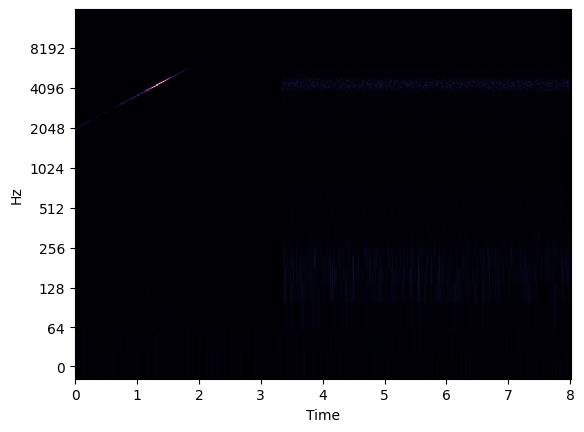

In [ ]:
import librosa
librosa.display.specshow(nb, sr=32000, x_axis='time', y_axis='log')

In [ ]:
import librosa
import numpy as np

a = '/workspace/extension/unet/wavs/left/left_0_3.wav'
# y = np.load(a)
y, sr = librosa.load(a, sr=32000)
# sr = 32000



In [ ]:
y

array([-0.0021795 , -0.00238907, -0.00218105, ..., -0.0022378 ,
       -0.00191736, -0.00209439], dtype=float32)

In [ ]:
D = librosa.stft(y, n_fft=512, hop_length=160, win_length=400, center=True)

/tmp/ipykernel_6558/505882285.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')


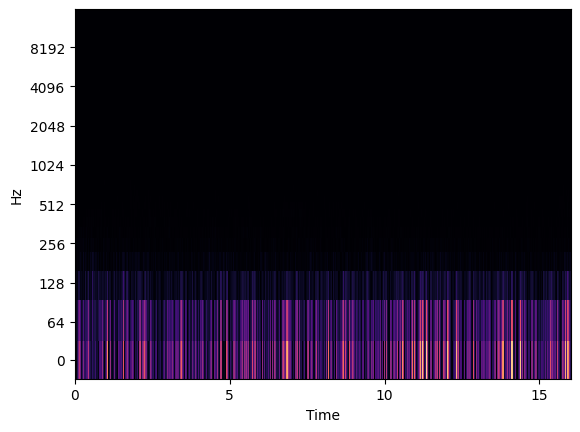

In [ ]:
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')

/tmp/ipykernel_6558/3979310871.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(D)


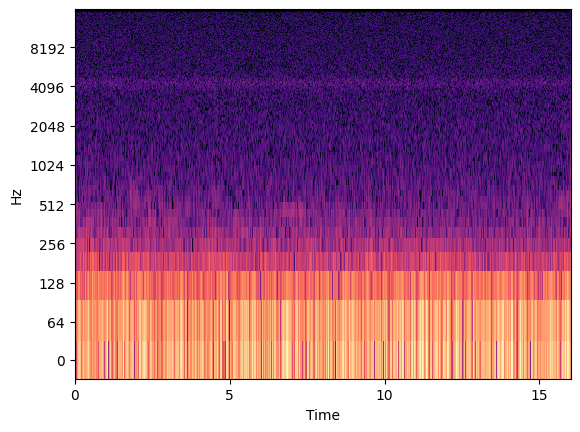

In [ ]:
# aclc db
D = librosa.amplitude_to_db(D)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')

In [ ]:
def normalize(samples, desired_rms = 0.1, eps = 1e-4):
    rms = np.maximum(eps, np.sqrt(np.mean(samples**2)))
    samples = samples * (desired_rms / rms)
    return samples

In [ ]:
audio_path = '/workspace/extension/unet/wavs/left/left_0_3.wav'
y, sr = librosa.load(audio_path, sr=32000)
#normalize the audio signal
y = normalize(y)
spec = librosa.stft(y, n_fft=512, hop_length=160, win_length=400, center=True)



/tmp/ipykernel_6558/1115860026.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')


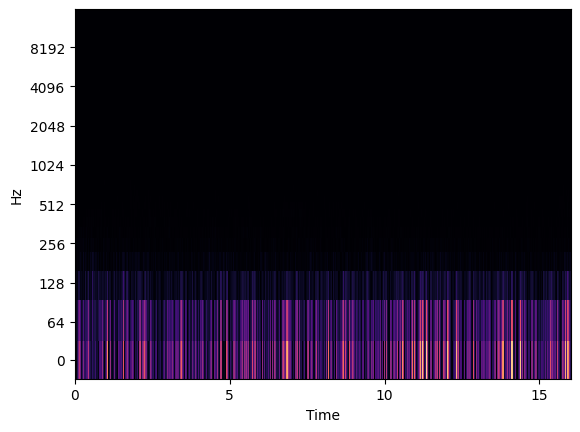

In [ ]:
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')

In [ ]:
y, sr = librosa.load(audio_path, sr=32000)
y

array([-0.0021795 , -0.00238907, -0.00218105, ..., -0.0022378 ,
       -0.00191736, -0.00209439], dtype=float32)

In [ ]:
#normalize the audio signal
y1 = normalize(y)
y1

array([-0.05618042, -0.06158244, -0.05622036, ..., -0.05768303,
       -0.04942328, -0.05398642], dtype=float32)

In [ ]:
spec = librosa.stft(y, n_fft=512, hop_length=160, win_length=400, center=True)
spec1 = librosa.stft(y1, n_fft=512, hop_length=160, win_length=400, center=True)


/tmp/ipykernel_6558/1115860026.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')


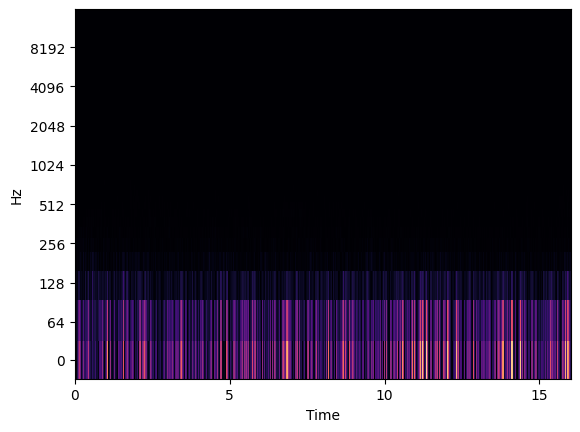

In [ ]:
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')

/tmp/ipykernel_6558/1635264737.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(spec1, sr=sr, x_axis='time', y_axis='log')


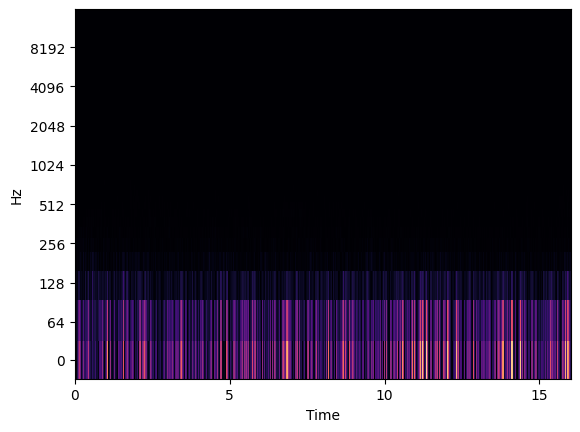

In [ ]:
librosa.display.specshow(spec1, sr=sr, x_axis='time', y_axis='log')

In [ ]:
import torch.nn as nn
critereon = nn.MSELoss()

In [ ]:
print(spec)
print(spec1)
print(critereon)

[[-2.1267213e-01+0.0000000e+00j -1.1527684e-01+0.0000000e+00j
   2.9784387e-01+0.0000000e+00j ... -8.0792874e-01+0.0000000e+00j
  -7.5455409e-01+0.0000000e+00j -3.6358133e-01+0.0000000e+00j]
 [ 1.5837717e-01-1.0975120e-01j  9.8057359e-02+1.6539057e-01j
  -2.4319424e-01+2.0993566e-02j ...  5.2220076e-01+1.5504719e-01j
   5.3628403e-01-9.0219513e-02j  2.0438577e-01+2.4785560e-01j]
 [-6.2128540e-02+1.3097511e-01j -6.1182961e-02-1.1659580e-01j
   1.1304501e-01-3.7061113e-03j ... -8.9508034e-02-1.5374933e-01j
  -1.6666928e-01+1.4625196e-01j  3.5405401e-02-2.1322353e-01j]
 ...
 [-9.5320278e-04+2.7264137e-05j  5.7348658e-05-7.0551374e-05j
   3.1628197e-06+8.1794069e-06j ... -1.2290955e-06+3.7335633e-06j
  -8.7277404e-05-8.3484818e-05j  1.2655462e-03-1.4576172e-05j]
 [ 9.5083995e-04-1.4762596e-05j -2.9897126e-05-7.3288749e-05j
  -2.1804171e-06-8.3813884e-06j ...  4.4293238e-06-7.0618984e-07j
   4.8364971e-05-1.1600249e-04j -1.2655017e-03+6.5169447e-06j]
 [-9.4958406e-04+0.0000000e+00j -9.06328

In [ ]:
loss = critereon(torch.tensor(spec.real), torch.tensor(spec1.real)) + critereon(torch.tensor(spec.imag), torch.tensor(spec1.imag))

In [ ]:
loss

tensor(2.0119)

In [ ]:
spec1.real.shape

(257, 1001)

In [ ]:
print(spec1.shape)
real = np.expand_dims(np.real(spec1), axis=0)
imag = np.expand_dims(np.imag(spec1), axis=0)
spec2 = np.concatenate((real, imag), axis=0)
spec2 = torch.from_numpy(spec2)

(257, 1001)


In [ ]:
spec2.shape

torch.Size([2, 257, 1001])

In [ ]:
# Third party shit
import sys
sys.path.append('/workspace/fourth_year_project/Freqency Domain/')
print("Started main")
import torch
import os
import torch.nn as nn
import glob
from torch.utils.tensorboard import SummaryWriter
print("Imported")
# Local imports
from SpectroDataset import SpectroDataset
from Autoencoder import AutoEncoder
from SpectroConverter import SpectroConverter
from WavSplitter import WavSplitter
from SidedSpectroDataset import SidedSpectroDataset


Started main
Imported


In [ ]:


num_channels = 2

left = AutoEncoder(input_channels=num_channels, out_channels=num_channels).cuda()

chkp_path = '/workspace/extension/unet/model_checkpoints3/model_loopnum_9_4_batch_10.pt'

checkpoint = torch.load(chkp_path)

left.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
# Load in mono
freqmonopath = '/workspace/extension/unet/freq/mono/mono_700.npy'
wavmonopath = '/workspace/extension/unet/wavs/mono/mono_700.wav'
angle = '90'

In [ ]:
from IPython.display import Audio

# Create an Audio object from an audio file
audio = Audio(filename=wavmonopath)

# Display the Audio object to play the audio
display(audio)

In [ ]:
import numpy as np
import torch
target = torch.from_numpy(np.load(freqmonopath))

In [ ]:
label = (float(angle),)

In [ ]:
input = torch.view_as_real(target)
input.shape

torch.Size([401, 501, 2])

In [ ]:
input = input.unsqueeze(0)
input.shape

torch.Size([1, 401, 501, 2])

In [ ]:
input = input.permute(0, 3, 1, 2)
input.shape

torch.Size([1, 2, 401, 501])

In [ ]:
label = torch.tensor(label).cuda()
input = input.cuda()
target = target.cuda()

In [ ]:
output = model(input, label)

In [ ]:
output.shape

torch.Size([1, 401, 501, 2])

In [ ]:
output

tensor([[[[-4.0843e-02,  1.1889e-01],
          [ 2.0312e-02,  5.4085e-02],
          [ 8.5312e-03,  1.0286e-01],
          ...,
          [ 6.8358e-03,  1.1287e-01],
          [-1.0995e-02,  8.4735e-02],
          [ 1.2032e-02,  8.7958e-02]],

         [[ 5.2326e-02,  4.1463e-02],
          [ 4.1988e-04, -2.1845e-02],
          [-7.8831e-05,  3.6470e-02],
          ...,
          [-6.0128e-02,  5.7772e-02],
          [-3.8938e-02, -4.0441e-02],
          [-1.5588e-02,  6.0005e-02]],

         [[-1.4615e-02,  6.2973e-02],
          [-5.9894e-02,  3.3633e-02],
          [ 1.0111e-02,  3.3796e-02],
          ...,
          [-4.7972e-02,  5.9259e-02],
          [-5.7662e-02,  1.2428e-02],
          [-5.2712e-02,  1.0683e-01]],

         ...,

         [[-2.9005e-02,  1.0634e-01],
          [ 1.4208e-03,  8.6226e-02],
          [-5.0182e-03,  8.5795e-02],
          ...,
          [-3.0861e-02,  9.6074e-02],
          [ 5.3226e-03,  1.2936e-01],
          [-6.3594e-03,  1.1090e-01]],

     

In [ ]:
output = output.squeeze(0)
output.shape

torch.Size([401, 501, 2])

In [ ]:
output = output.contiguous()
output = torch.view_as_complex(output)
output.shape

torch.Size([401, 501])

In [ ]:
output

tensor([[-4.0843e-02+0.1189j,  2.0312e-02+0.0541j,  8.5312e-03+0.1029j,
          ...,  6.8358e-03+0.1129j, -1.0995e-02+0.0847j,
          1.2032e-02+0.0880j],
        [ 5.2326e-02+0.0415j,  4.1988e-04-0.0218j, -7.8831e-05+0.0365j,
          ..., -6.0128e-02+0.0578j, -3.8938e-02-0.0404j,
         -1.5588e-02+0.0600j],
        [-1.4615e-02+0.0630j, -5.9894e-02+0.0336j,  1.0111e-02+0.0338j,
          ..., -4.7972e-02+0.0593j, -5.7662e-02+0.0124j,
         -5.2712e-02+0.1068j],
        ...,
        [-2.9005e-02+0.1063j,  1.4208e-03+0.0862j, -5.0182e-03+0.0858j,
          ..., -3.0861e-02+0.0961j,  5.3226e-03+0.1294j,
         -6.3594e-03+0.1109j],
        [-3.2055e-02+0.1116j,  5.2986e-04+0.0877j, -1.5772e-02+0.0981j,
          ..., -2.4813e-02+0.1003j, -5.0568e-02+0.1067j,
          1.4083e-02+0.0846j],
        [-2.3079e-02+0.0816j, -1.3686e-02+0.0736j, -1.5224e-02+0.0761j,
          ..., -4.9026e-02+0.0751j, -2.3673e-04+0.0912j,
          1.7665e-02+0.0654j]], device='cuda:0',
       gr

In [ ]:
output_stft = output * target
print("Target shape: ", target.shape)
print("Output shape: ", output.shape)
print("Output stft shape: ", output_stft.shape)

Target shape:  torch.Size([401, 501])
Output shape:  torch.Size([401, 501])
Output stft shape:  torch.Size([401, 501])


In [ ]:
target * output

tensor([[ 9.3731e-02-2.7285e-01j, -2.5255e-03-6.7247e-03j,
         -5.4959e-04-6.6261e-03j,  ...,
          3.2233e-04+5.3220e-03j,  1.3535e-04-1.0431e-03j,
          2.2564e-03+1.6494e-02j],
        [ 1.1319e-01+1.0834e-01j,  6.1525e-03+3.2909e-03j,
          2.1086e-03-1.5224e-03j,  ...,
          3.0875e-04+4.8769e-04j, -1.6149e-03-9.2494e-03j,
          1.2855e-03-2.3103e-03j],
        [ 5.3535e-02-1.8094e-01j,  9.6529e-02+4.8411e-03j,
          5.9166e-02-2.0458e-02j,  ...,
          3.3263e-02-5.6590e-02j,  4.9150e-02+3.8793e-02j,
          2.9377e-02+3.8851e-02j],
        ...,
        [ 8.0480e-04-3.0744e-03j,  2.2025e-04-7.8271e-05j,
          8.4573e-07+8.7940e-07j,  ...,
          9.2577e-07+1.0768e-08j, -1.8186e-04-5.0880e-05j,
          8.2941e-05-1.6675e-03j],
        [-9.0809e-04+3.2228e-03j,  1.3812e-04-1.9357e-04j,
         -2.3690e-07-1.1328e-06j,  ...,
         -1.1795e-06-4.1201e-07j, -3.1841e-05-1.6700e-04j,
          2.1616e-04+1.2701e-03j],
        [ 6.6556e-04-2

In [ ]:
output * target

tensor([[ 9.3731e-02-2.7285e-01j, -2.5255e-03-6.7247e-03j,
         -5.4959e-04-6.6261e-03j,  ...,
          3.2233e-04+5.3220e-03j,  1.3535e-04-1.0431e-03j,
          2.2564e-03+1.6494e-02j],
        [ 1.1319e-01+1.0834e-01j,  6.1525e-03+3.2909e-03j,
          2.1086e-03-1.5224e-03j,  ...,
          3.0875e-04+4.8769e-04j, -1.6149e-03-9.2494e-03j,
          1.2855e-03-2.3103e-03j],
        [ 5.3535e-02-1.8094e-01j,  9.6529e-02+4.8411e-03j,
          5.9166e-02-2.0458e-02j,  ...,
          3.3263e-02-5.6590e-02j,  4.9150e-02+3.8793e-02j,
          2.9377e-02+3.8851e-02j],
        ...,
        [ 8.0480e-04-3.0744e-03j,  2.2025e-04-7.8271e-05j,
          8.4573e-07+8.7940e-07j,  ...,
          9.2577e-07+1.0768e-08j, -1.8186e-04-5.0880e-05j,
          8.2941e-05-1.6675e-03j],
        [-9.0809e-04+3.2228e-03j,  1.3812e-04-1.9357e-04j,
         -2.3690e-07-1.1328e-06j,  ...,
         -1.1795e-06-4.1201e-07j, -3.1841e-05-1.6700e-04j,
          2.1616e-04+1.2701e-03j],
        [ 6.6556e-04-2

In [ ]:
freqrealpath = '/workspace/extension/unet/freq/left/left_90_700.npy'
monorealpath = '/workspace/extension/unet/freq/mono/mono_700.npy'
real_stft = np.load(freqrealpath)
mono_stft = np.load(monorealpath)

In [ ]:
critereon = nn.MSELoss()
loss = critereon(torch.tensor(real_stft.real), torch.tensor(mono_stft.real)) + critereon(torch.tensor(real_stft.imag), torch.tensor(mono_stft.imag))
print(loss)

tensor(1.5795)


In [ ]:
output_stft = output_stft.cpu().detach().numpy()
loss = critereon(torch.tensor(output_stft.real), torch.tensor(mono_stft.real)) + critereon(torch.tensor(output_stft.imag), torch.tensor(mono_stft.imag))
print(loss)

tensor(1.5344)


/tmp/ipykernel_3073/3072707869.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(real_stft, sr=32000, x_axis='time', y_axis='log')


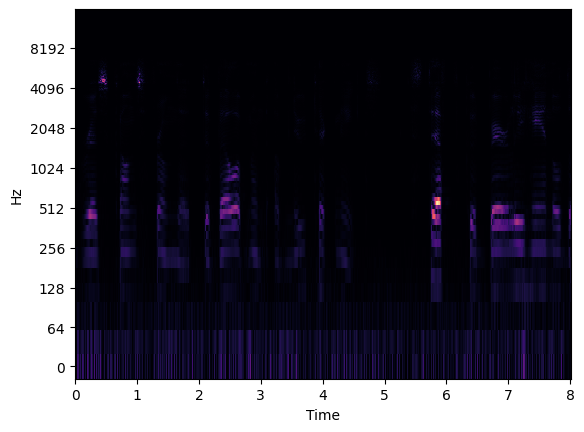

In [ ]:
import librosa
librosa.display.specshow(real_stft, sr=32000, x_axis='time', y_axis='log')

In [ ]:
stft_numpy_cpu = output_stft.cpu().detach().numpy()


In [ ]:
stft_numpy_cpu

array([[ 9.37314928e-02-2.7285150e-01j, -2.52549606e-03-6.7246575e-03j,
        -5.49589167e-04-6.6261482e-03j, ...,
         3.22325883e-04+5.3219767e-03j,  1.35349313e-04-1.0431426e-03j,
         2.25635292e-03+1.6494451e-02j],
       [ 1.13194816e-01+1.0833697e-01j,  6.15249528e-03+3.2909268e-03j,
         2.10855459e-03-1.5224158e-03j, ...,
         3.08746909e-04+4.8769091e-04j, -1.61486212e-03-9.2493901e-03j,
         1.28547079e-03-2.3102632e-03j],
       [ 5.35346605e-02-1.8094355e-01j,  9.65293869e-02+4.8411288e-03j,
         5.91656379e-02-2.0457735e-02j, ...,
         3.32625620e-02-5.6590457e-02j,  4.91500646e-02+3.8793206e-02j,
         2.93770600e-02+3.8850777e-02j],
       ...,
       [ 8.04804557e-04-3.0744309e-03j,  2.20247093e-04-7.8270939e-05j,
         8.45725651e-07+8.7940185e-07j, ...,
         9.25768575e-07+1.0767841e-08j, -1.81857962e-04-5.0880306e-05j,
         8.29406199e-05-1.6674969e-03j],
       [-9.08092596e-04+3.2228264e-03j,  1.38120959e-04-1.9356611e-0

/tmp/ipykernel_3073/3727784485.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft_numpy_cpu, sr=32000, x_axis='time', y_axis='log')


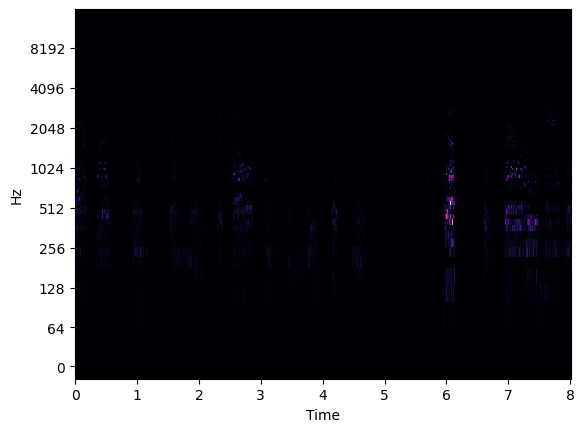

In [ ]:
librosa.display.specshow(stft_numpy_cpu, sr=32000, x_axis='time', y_axis='log') 

/tmp/ipykernel_3073/2653203415.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(output.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log')


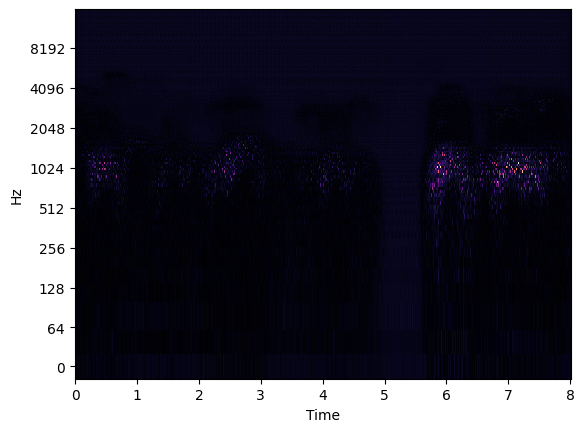

In [ ]:
librosa.display.specshow(output.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log') 

/tmp/ipykernel_3073/1155727613.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(target.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log')


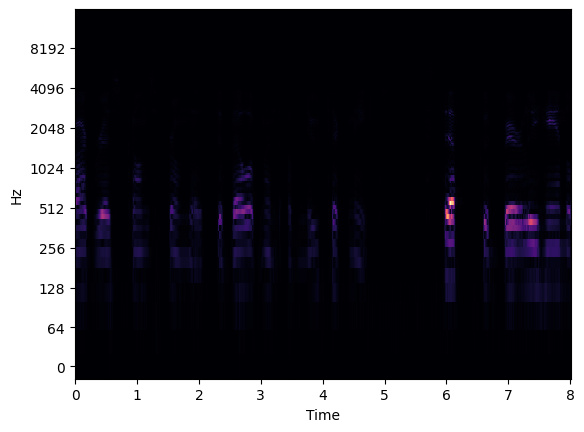

In [ ]:
librosa.display.specshow(target.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log') 

In [ ]:
# convert output_stft to wav
waveform = librosa.istft(stft_numpy_cpu, hop_length=160, win_length=400)
waveform.shape

(80000,)

In [ ]:
from IPython.display import Audio

audio = Audio(waveform, rate=32000)  # Replace 32000 with the actual sample rate

# Display the Audio object to play the audio
display(audio)

In [ ]:
y, sr = librosa.load(wavmonopath, sr=32000)

In [ ]:
y.shape

(160000,)

80000.0

In [ ]:
output_stft[10,:10]

tensor([-0.1346-0.4443j, -0.0096-0.0410j,  0.0226-0.0383j,  0.0454-0.0961j,
        -0.0938-0.2467j, -0.0212+0.3382j, -0.0333-0.1066j, -0.1976+0.0160j,
         0.3260+0.2079j, -0.1647+0.1511j], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
stft_numpy_cpu[10,:10]

array([-0.13455407-0.44428006j, -0.00956324-0.04103079j,
        0.02256676-0.03831744j,  0.04540021-0.0960609j ,
       -0.09381747-0.2466838j , -0.0211552 +0.33822796j,
       -0.03331493-0.10661605j, -0.19762202+0.01603697j,
        0.3260241 +0.20791653j, -0.16468015+0.15106674j], dtype=complex64)

In [ ]:
audio_path = '/workspace/extension/unet/wavs/left/left_0_3.wav'


In [ ]:
y, sr = librosa.load(audio_path, sr=32000)
#normalize the audio signal
print(y.shape)
y


(160000,)


array([-0.0021795 , -0.00238907, -0.00218105, ..., -0.0022378 ,
       -0.00191736, -0.00209439], dtype=float32)

In [ ]:
def normalize(samples, desired_rms = 0.1, eps = 1e-4):
    rms = np.maximum(eps, np.sqrt(np.mean(samples**2)))
    samples = samples * (desired_rms / rms)
    return samples

y = normalize(y)
print(y.shape)
y


(160000,)


array([-0.05618042, -0.06158244, -0.05622036, ..., -0.05768303,
       -0.04942328, -0.05398642], dtype=float32)

In [ ]:
spec = librosa.stft(y, n_fft=512, hop_length=160, win_length=400, center=True)
print(spec.shape)
spec


(257, 1001)


array([[-5.4819865e+00+0.0000000e+00j, -2.9714572e+00+0.0000000e+00j,
         7.6774335e+00+0.0000000e+00j, ...,
        -2.0825741e+01+0.0000000e+00j, -1.9449919e+01+0.0000000e+00j,
        -9.3719282e+00+0.0000000e+00j],
       [ 4.0824418e+00-2.8290243e+00j,  2.5275958e+00+4.2632236e+00j,
        -6.2687464e+00+5.4114497e-01j, ...,
         1.3460615e+01+3.9966059e+00j,  1.3823636e+01-2.3255618e+00j,
         5.2683916e+00+6.3889008e+00j],
       [-1.6014690e+00+3.3761067e+00j, -1.5770952e+00-3.0054555e+00j,
         2.9139278e+00-9.5531337e-02j, ...,
        -2.3072221e+00-3.9631512e+00j, -4.2961850e+00+3.7698934e+00j,
         9.1263461e-01-5.4962001e+00j],
       ...,
       [-2.4570420e-02+7.0277153e-04j,  1.4782683e-03-1.8185821e-03j,
         8.1529623e-05+2.1084746e-04j, ...,
        -3.1669966e-05+9.6243020e-05j, -2.2497391e-03-2.1519312e-03j,
         3.2621615e-02-3.7574148e-04j],
       [ 2.4509523e-02-3.8052493e-04j, -7.7064417e-04-1.8891420e-03j,
        -5.6199606e-05

In [ ]:
real = np.expand_dims(np.real(spec), axis=0)
imag = np.expand_dims(np.imag(spec), axis=0)
print(real.shape)
print(imag.shape)

(1, 257, 1001)
(1, 257, 1001)


In [ ]:
spec = np.concatenate((real, imag), axis=0)
print(spec.shape)

(2, 257, 1001)


In [ ]:
spec = torch.from_numpy(spec)
print(spec.shape)

torch.Size([2, 257, 1001])


In [ ]:
#np.save(os.path.join(output_dir, file.replace('.wav', '')), D)
torch.FloatTensor(spec)
print(spec.shape)

torch.Size([2, 257, 1001])


In [ ]:
savedfile = '/workspace/extension/unet/freq/left/left_0_3.npy'
saved = np.load(savedfile)
print(saved.shape)

(401, 501)


In [ ]:
saved

array([[-2.4486834e-01+0.00000000e+00j,  2.1489838e-01+0.00000000e+00j,
        -3.9703691e-01+0.00000000e+00j, ...,
        -3.3829124e+00+0.00000000e+00j, -1.8303249e+00+0.00000000e+00j,
        -7.4357396e-01+0.00000000e+00j],
       [ 2.5479457e-01-1.00237265e-01j, -3.5077438e-01+9.98008400e-02j,
         3.3930549e-01-2.26062730e-01j, ...,
         1.7100800e+00+5.05437672e-01j,  7.7240348e-01+3.15386534e-01j,
         3.8475326e-01+5.00731945e-01j],
       [-1.2920971e-01+2.18473971e-01j,  3.1050247e-01-3.63761522e-02j,
        -1.4035669e-01+8.80076885e-02j, ...,
        -6.6096373e-02-5.51197492e-02j,  1.7386831e-01-1.71762735e-01j,
         3.7539415e-02-4.07430977e-01j],
       ...,
       [-9.4742718e-04+1.99066762e-05j, -2.5610236e-05-6.80454250e-05j,
        -4.2090765e-06+5.44136947e-06j, ...,
         9.7880857e-06+3.47830064e-06j,  3.1173753e-05-1.13476002e-04j,
         1.2661283e-03-9.48702927e-06j],
       [ 9.4927306e-04-6.10484449e-06j, -7.3784329e-05-5.87053255e-0

In [ ]:
sp = SidedSpectroDataset('/workspace/extension/unet/freq/mono', '/workspace/extension/unet/freq/left', chunk_size=20)
sp.load_chunk()

Done loading chunk


In [ ]:
crit = nn.MSELoss()
model.eval()
model = model.cuda()
o1 = None
o2 = None
o3 = None
o4 = None
for i, (mono, label, left) in enumerate(sp):
    mono = torch.view_as_real(mono)
    mono = mono.unsqueeze(0)
    mono = mono.permute(0, 3, 1, 2)
    angle = torch.tensor(label).unsqueeze(0).cuda()
    # print(angle)
    mono = mono.cuda()
    left = left.cuda()
    
    # print(mono.shape, left.shape)
    output = model(mono, angle)
    # print(mono.shape, output.shape)
    output = output.squeeze(0)
    output = output.contiguous()
    output = torch.view_as_complex(output)
    # print(mono.shape, output.shape)
    mono = mono.squeeze(0)
    mono = mono.contiguous()
    # print(mono.shape, output.shape)
    mono = mono.permute(1, 2, 0)
    # print(mono.shape, output.shape)
    mono = mono.contiguous()
    mono = torch.view_as_complex(mono)
    #print(mono.shape, output.shape)
    output_stft = output * mono
    #print(output_stft.shape)
    o1 = mono
    o2 = left
    o3 = output
    o4 = output_stft
    
    loss = crit(output_stft.real, left.real) + crit(output_stft.imag, left.imag)
    print(angle)
    print(loss)
    break

    

tensor(0.0180, device='cuda:0', grad_fn=<AddBackward0>)


In [ ]:
o1.shape

torch.Size([401, 501])

In [ ]:
o2.shape

torch.Size([401, 501])

In [ ]:
o3.shape

torch.Size([401, 501])

In [ ]:
o4.shape

torch.Size([401, 501])

/tmp/ipykernel_3073/4038475871.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o1.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log')


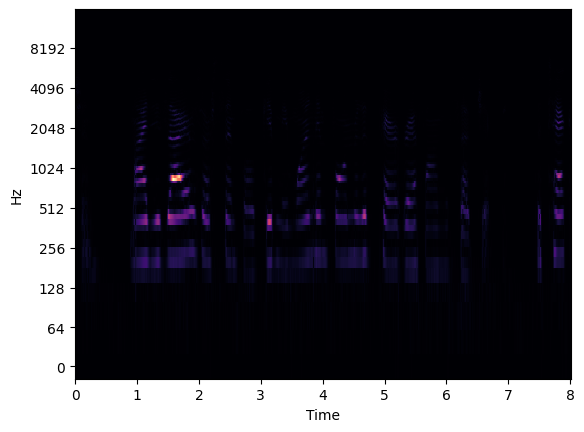

In [ ]:
librosa.display.specshow(o1.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log')

/tmp/ipykernel_3073/1835599530.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o2.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log')


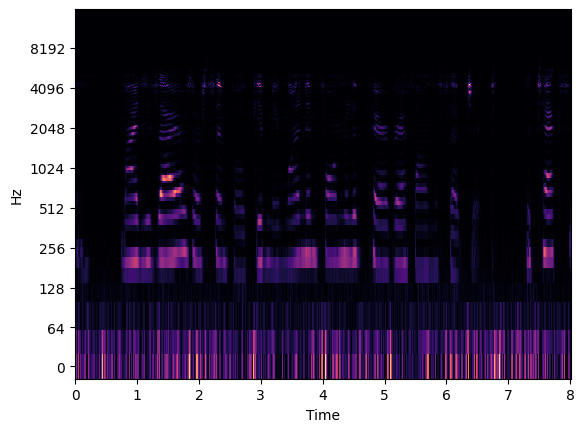

In [ ]:
librosa.display.specshow(o2.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log')

/tmp/ipykernel_3073/2595085143.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o3.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log')


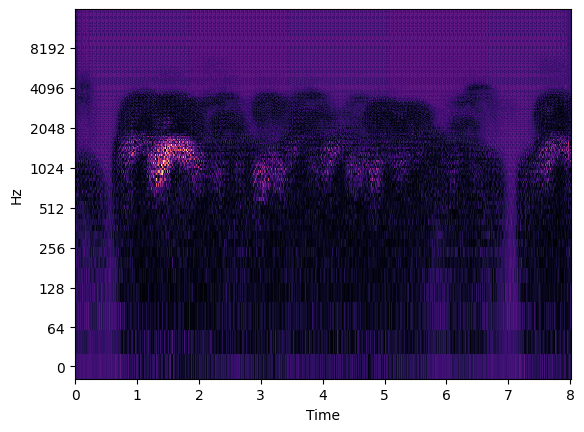

In [ ]:
librosa.display.specshow(o3.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log')

/tmp/ipykernel_3073/3061533479.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o4.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log')


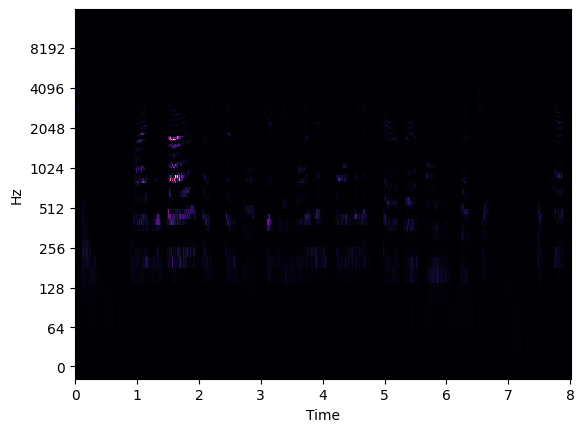

In [ ]:
librosa.display.specshow(o4.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log')

In [ ]:
o2

tensor([[-1.2698e+00+0.0000e+00j, -1.2742e+00+0.0000e+00j,
         -5.0610e-01+0.0000e+00j,  ...,
          1.0041e+00+0.0000e+00j,  9.4972e-01+0.0000e+00j,
          2.4622e-02+0.0000e+00j],
        [ 7.2251e-01-7.5677e-01j,  6.4054e-01+6.5413e-01j,
          7.6804e-02-2.3367e-01j,  ...,
         -6.6442e-01+5.0676e-01j, -5.1933e-01-4.3299e-01j,
          6.4533e-02-4.7600e-02j],
        [-9.1878e-02+5.5675e-01j,  3.7208e-02-3.3621e-01j,
          9.5108e-02+9.5791e-02j,  ...,
          2.2096e-01-3.0563e-01j,  7.7253e-02+1.4122e-01j,
         -4.4500e-02-4.7451e-02j],
        ...,
        [-4.2743e-03+2.7864e-05j, -1.4027e-04-3.7509e-04j,
          1.8017e-06-9.5330e-06j,  ...,
          7.2290e-06+4.5496e-06j,  6.5763e-05-2.1241e-04j,
          2.3132e-03-2.1388e-05j],
        [ 4.2759e-03-7.5383e-06j, -3.1224e-04-2.4802e-04j,
         -8.0986e-06+7.1916e-06j,  ...,
         -6.6464e-06-7.0889e-06j,  1.7397e-04-1.3268e-04j,
         -2.3173e-03+1.4377e-05j],
        [-4.2826e-03+0

In [ ]:
o4

tensor([[-7.5644e-04-2.9728e-02j, -6.3901e-03-1.9720e-02j,
          1.4975e-03+1.4761e-02j,  ...,
         -9.5719e-04+7.8595e-03j,  2.6977e-03-1.0352e-02j,
          3.6384e-04-9.7941e-04j],
        [ 1.7245e-02+3.6542e-03j, -3.2125e-02+8.8937e-03j,
          2.1932e-02-1.5931e-02j,  ...,
          1.1387e-02+1.0890e-02j, -3.0650e-03-1.3877e-02j,
          5.3060e-03+4.1998e-03j],
        [-6.5820e-04+8.0740e-03j,  5.0856e-02+7.4176e-03j,
          2.7289e-02+2.8963e-02j,  ...,
         -7.2529e-03+1.0897e-03j,  7.5198e-03+9.2672e-03j,
          2.1846e-02-2.5372e-02j],
        ...,
        [ 2.1634e-04-9.5094e-04j,  6.5601e-05-2.2665e-05j,
         -6.7917e-09-8.3136e-07j,  ...,
         -1.0391e-06+3.0703e-07j,  1.1723e-05+2.4079e-06j,
         -4.6822e-06+1.0434e-04j],
        [-2.0312e-04+9.8254e-04j,  4.2653e-05-5.5150e-05j,
         -3.7294e-07+1.3907e-06j,  ...,
          9.0300e-07-3.0738e-07j,  1.7557e-06+1.1803e-05j,
         -1.2979e-05-8.2865e-05j],
        [ 1.9855e-04-7

In [ ]:
from IPython.display import Audio

waveform = librosa.istft(o1.cpu().detach().numpy(), hop_length=160, win_length=400)
#stereo_waveform = np.array([waveform, np.zeros_like(waveform)])
#print(stereo_waveform.shape)
audio = Audio(waveform, rate=32000)  # Replace 32000 with the actual sample rate

# Display the Audio object to play the audio
display(audio)

(2, 80000)


In [ ]:
from IPython.display import Audio

waveform = librosa.istft(o2.cpu().detach().numpy(), hop_length=160, win_length=400)
stereo_waveform = np.array([waveform, np.zeros_like(waveform)])
print(stereo_waveform.shape)
audio = Audio(stereo_waveform, rate=32000)  # Replace 32000 with the actual sample rate

# Display the Audio object to play the audio
display(audio)

(2, 80000)


In [ ]:
from IPython.display import Audio

waveform = librosa.istft(o3.cpu().detach().numpy(), hop_length=160, win_length=400)
stereo_waveform = np.array([waveform, np.zeros_like(waveform)])
print(stereo_waveform.shape)
audio = Audio(stereo_waveform, rate=32000)  # Replace 32000 with the actual sample rate

# Display the Audio object to play the audio
display(audio)

(2, 80000)


In [ ]:
from IPython.display import Audio

waveform = librosa.istft(o4.cpu().detach().numpy(), hop_length=160, win_length=400)
stereo_waveform = np.array([waveform, np.zeros_like(waveform)])
print(stereo_waveform.shape)
audio = Audio(stereo_waveform, rate=32000)  # Replace 32000 with the actual sample rate

# Display the Audio object to play the audio
display(audio)

(2, 80000)


In [1]:
# Third party shit
import sys
sys.path.append('/workspace/fourth_year_project/Freqency Domain/')
print("Started main")
import torch
import os
import torch.nn as nn
import glob
from torch.utils.tensorboard import SummaryWriter
print("Imported")
# Local imports
from SpectroDataset import SpectroDataset
from Autoencoder import AutoEncoder
from SpectroConverter import SpectroConverter
from WavSplitter import WavSplitter
from SidedSpectroDataset import SidedSpectroDataset
import numpy as np


Started main
Imported


In [2]:

num_channels = 2

left_model = AutoEncoder(input_channels=num_channels, out_channels=num_channels).cuda()

chkp_path = '/workspace/extension/unet/model_checkpoints5/model_right_loopnum_0_1_batch_6.pt'

checkpoint = torch.load(chkp_path)

left_model.load_state_dict(checkpoint['model_state_dict'])


<All keys matched successfully>

In [5]:
crit = nn.MSELoss()
left_model.eval()
left_model = left_model.cuda()
# right_model.eval()
# right_model = right_model.cuda()
o1 = None
o2 = None
o3 = None
# o4 = None

mono = torch.from_numpy(np.load('/workspace/extension/unet/freq/mono/mono_700.npy'))
left = torch.from_numpy(np.load('/workspace/extension/unet/freq/left/left_135_700.npy'))
# right = torch.from_numpy(np.load('/workspace/extension/unet/freq/right/right_135_700.npy'))
label = 135.0

label = torch.tensor(label).cuda()
left = left.cuda()
# right = right.cuda()
base_mono = mono.cuda()

In [9]:
mono = torch.view_as_real(base_mono)
mono = mono.unsqueeze(0)
mono = mono.permute(0, 3, 1, 2)
angle = torch.tensor(label).unsqueeze(0).cuda()

# print(mono.shape, left.shape)
left_output = left_model(mono, angle)
# print(mono.shape, left_output.shape)
left_output = left_output.squeeze(0)
left_output = left_output.contiguous()
left_output = torch.view_as_complex(left_output)
# print(mono.shape, left_output.shape)
mono = mono.squeeze(0)
mono = mono.contiguous()
# print(mono.shape, left_output.shape)
mono = mono.permute(1, 2, 0)
# print(mono.shape, left_output.shape)
mono = mono.contiguous()
mono = torch.view_as_complex(mono)
#print(mono.shape, left_output.shape)
#print(left_output_stft.shape)
o1 = mono
o2 = left
o3 = left_output

loss = crit(left_output.real, left.real) + crit(left_output.imag, left.imag)
print(angle)
print(loss)


    

/tmp/ipykernel_15422/3199656119.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  angle = torch.tensor(label).unsqueeze(0).cuda()


tensor([135.], device='cuda:0')
tensor(0.0281, device='cuda:0', grad_fn=<AddBackward0>)


/tmp/ipykernel_15422/3670494805.py:7: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o1.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[0])
/tmp/ipykernel_15422/3670494805.py:10: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o2.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[1])
/tmp/ipykernel_15422/3670494805.py:13: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o3.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[2])


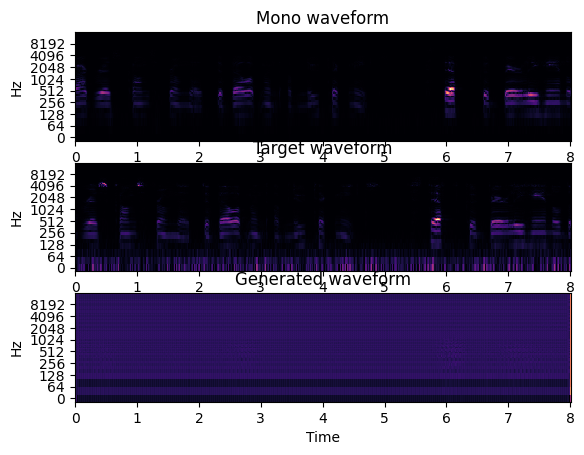

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)

librosa.display.specshow(o1.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[0])
axs[0].set_title('Mono waveform')

librosa.display.specshow(o2.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[1])
axs[1].set_title('Target waveform')

librosa.display.specshow(o3.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[2])
axs[2].set_title('Generated waveform')

plt.show()

In [6]:
mono = torch.view_as_real(base_mono)
mono = mono.unsqueeze(0)
mono = mono.permute(0, 3, 1, 2)
angle = torch.tensor(label).unsqueeze(0).cuda()

# print(mono.shape, left.shape)
right_output = right_model(mono, angle)
# print(mono.shape, right_output.shape)
right_output = right_output.squeeze(0)
right_output = right_output.contiguous()
right_output = torch.view_as_complex(right_output)
# print(mono.shape, right_output.shape)
mono = mono.squeeze(0)
mono = mono.contiguous()
# print(mono.shape, right_output.shape)
mono = mono.permute(1, 2, 0)
# print(mono.shape, right_output.shape)
mono = mono.contiguous()
mono = torch.view_as_complex(mono)
#print(mono.shape, right_output.shape)
right_output_stft = right_output * mono
#print(left_output_stft.shape)
o1 = mono
o2 = right
o3 = right_output
o4 = right_output_stft

loss = crit(right_output_stft.real, right.real) + crit(right_output_stft.imag, right.imag)
print(angle)
print(loss)


    

tensor([135.], device='cuda:0')
tensor(0.0598, device='cuda:0', grad_fn=<AddBackward0>)


/tmp/ipykernel_14515/2960321934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  angle = torch.tensor(label).unsqueeze(0).cuda()


/tmp/ipykernel_14515/1430781765.py:7: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o1.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[0])
/tmp/ipykernel_14515/1430781765.py:10: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o2.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[1])
/tmp/ipykernel_14515/1430781765.py:13: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o4.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[2])


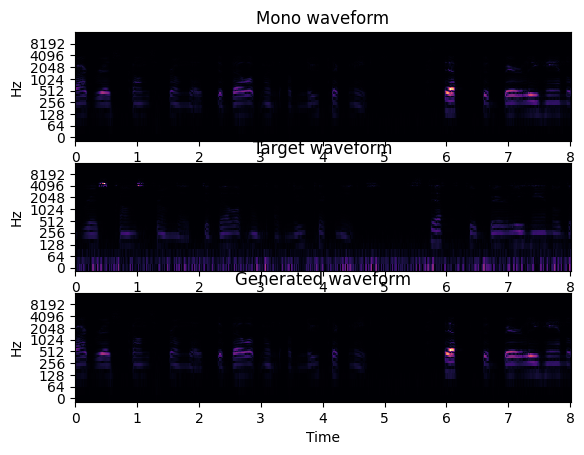

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)

librosa.display.specshow(o1.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[0])
axs[0].set_title('Mono waveform')

librosa.display.specshow(o2.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[1])
axs[1].set_title('Target waveform')

librosa.display.specshow(o4.cpu().detach().numpy(), sr=32000, x_axis='time', y_axis='log', ax=axs[2])
axs[2].set_title('Generated waveform')

plt.show()

In [14]:
# convert left and right outputs to wav then concatenate
import librosa
samples_per_window = 5 * 32000
left_waveform = librosa.istft(left_output_stft.cpu().detach().numpy(), hop_length=160, win_length=400)
right_waveform = librosa.istft(right_output_stft.cpu().detach().numpy(), hop_length=160, win_length=400)
stereo_waveform = np.array([left_waveform, right_waveform])
print(left_waveform.shape)
print(right_waveform.shape)
print(stereo_waveform.shape)


(80000,)
(80000,)
(2, 80000)


In [15]:
# Play it
from IPython.display import Audio
audio = Audio(stereo_waveform, rate=32000)  # Replace 32000 with the actual sample rate

# Display the Audio object to play the audio
display(audio)

In [16]:
# Play it
from IPython.display import Audio
audio = Audio(right_waveform, rate=32000)  # Replace 32000 with the actual sample rate

# Display the Audio object to play the audio
display(audio)

In [10]:
# Play it

import librosa
samples_per_window = 5 * 32000
left_waveform = librosa.istft(left_output_stft.cpu().detach().numpy(), hop_length=160, win_length=400)

from IPython.display import Audio
audio = Audio(left_waveform, rate=32000)  # Replace 32000 with the actual sample rate

# Display the Audio object to play the audio
display(audio)

NameError: name 'left_waveform' is not defined

In [2]:
import os
import librosa
import numpy as np
import torch

In [2]:
file_list = os.listdir('/workspace/extension/unet/wavs/left')

In [3]:
file = file_list[800]

In [4]:
file

'left_0_800.wav'

In [5]:
angle = file.split('_')[1]
index = file.split('_')[2].replace('.wav', '')


In [174]:
# # left_0_0.wav
# left_audio_path = os.path.join('/workspace/extension/unet/wavs/left', file)
# # right_0_0.wav
# right_audio_path = os.path.join('/workspace/extension/unet/wavs/right', f'right_{angle}_{index}.wav')
# # mono_0.wav
# mono_audio_path = os.path.join('/workspace/extension/unet/wavs/mono', f'mono_{index}.wav')

left_wav, _ = librosa.load('/workspace/extension/unet/unchopped2/left_0.wav', sr=32000)
#right_wav, _ = librosa.load('/workspace/extension/unet/unchopped/right_90.wav', sr=32000)
mono_wav, sr = librosa.load('/workspace/extension/unet/unchopped/mono_clean.wav', sr=32000)



In [176]:
print(left_wav.shape)
print(mono_wav.shape)
print(547243731 - 543826727)

(547243731,)
(543826727,)
3417004


In [177]:
3417004 / 32000

106.781375

In [172]:
left_wav, _ = librosa.load('/workspace/extension/unet/unchopped2/left_0.wav', sr=32000)

In [ ]:
type(left_wav)

  File "/workspace/venv_work/lib/python3.8/site-packages/IPython/core/completer.py", line 3171, in _complete
    result = matcher(context)
  File "/workspace/venv_work/lib/python3.8/site-packages/IPython/core/completer.py", line 2004, in file_matcher
    matches = self.file_matches(context.token)
  File "/workspace/venv_work/lib/python3.8/site-packages/IPython/core/completer.py", line 2093, in file_matches
    return [x+'/' if os.path.isdir(x) else x for x in matches]
  File "/workspace/venv_work/lib/python3.8/site-packages/IPython/core/completer.py", line 2093, in <listcomp>
    return [x+'/' if os.path.isdir(x) else x for x in matches]
  File "/opt/conda/lib/python3.8/genericpath.py", line 42, in isdir
    st = os.stat(s)
KeyboardInterrupt


numpy.ndarray

In [4]:
import cupy as cp

# Convert numpy arrays to cupy arrays
left_wav_gpu = cp.asarray(left_wav)
mono_wav_gpu = cp.asarray(mono_wav)


/workspace/venv_work/lib/python3.8/site-packages/cupy/_creation/from_data.py:75: PerformanceWarning: Using synchronous transfer as pinned memory (2188800000 bytes) could not be allocated. This generally occurs because of insufficient host memory. The original error was: cudaErrorMemoryAllocation: out of memory
  return _core.array(a, dtype, False, order)


In [ ]:

# Compute the convolution on the GPU
left_filter_gpu = cp.convolve(left_wav_gpu, mono_wav_gpu, mode='valid')

# Convert the result back to a numpy array if needed
left_filter = cp.asnumpy(left_filter_gpu)

In [ ]:
54000000 /32000

33.333333333333336

In [5]:
# Compute the matched filter between left and mono
left_filter = np.convolve(mono_wav[42000000-32000:42032000+32000], left_wav[42000000:42032000])
time_shift = np.argmax(left_filter)
print(time_shift)



79124


In [28]:

right_filter = np.convolve(mono_wav[:64000], right_wav[32000:64000])
time_shift = np.argmax(right_filter)
print(time_shift)

73690


In [43]:
all_list = []

In [122]:
matchspan = 128000
target_index = 280000000
multipier = 3

'''
21283
22210
19965
20662
21841
20242
20662
21488
22413
19939'''

In [167]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

matchspan = 64000
multipier = 3
outputarr = []

for j in range(10):
    # target_index = 100000000 + (10 * j * 32000)
    # generate random number between 1000000 and 50000000
    target_index = np.random.randint(1000000, 500000000)
    # monosub = mono_wav[target_index-(matchspan*multipier):target_index+(matchspan*multipier)]
    # leftsub = left_wav[target_index:target_index+matchspan]
    monosub = left_wav[target_index-(matchspan*multipier):target_index+(matchspan*multipier)]
    leftsub = mono_wav[target_index:target_index+matchspan]
    monosub = moving_average(monosub, 100)
    leftsub = moving_average(leftsub, 100)
    a = len(monosub) - len(leftsub)
    #print(a)
    maxVal = 0
    maxIndex = 0
    for i in range(a):
        #print(i, i+len(leftsub))
        temp_mono = monosub[i:i+len(leftsub)]
        #print(temp_mono.shape)
        #print(leftsub.shape)
        res = np.sum(leftsub * temp_mono)
        outputarr.append(res)
        if(res > maxVal):
            maxVal = res
            maxIndex = i
    delay = maxIndex-(matchspan*multipier)
    print(f"Delay: {delay}, Max index: {maxIndex}")

Delay: -21283, Max index: 170717
Delay: -21969, Max index: 170031
Delay: -19844, Max index: 172156
Delay: -20663, Max index: 171337
Delay: -21852, Max index: 170148
Delay: -20233, Max index: 171767


KeyboardInterrupt: 

In [124]:
print(maxVal, maxIndex)

22.98094 404365


In [125]:
delay = maxIndex-(matchspan*multipier)
print(delay)

20365


In [126]:
print(delay / 32000)

0.63640625


In [127]:
all_list.append(delay/32000)

In [128]:
all_list

[0.59309375,
 0.684,
 0.66471875,
 0.6650625,
 0.692125,
 0.5955625,
 0.67496875,
 0.67275,
 0.66046875,
 0.6659375,
 0.6725,
 0.63640625]

In [145]:
sum((np.array(all_list) * 32000)) / len(all_list)

21006.916666666668

In [138]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

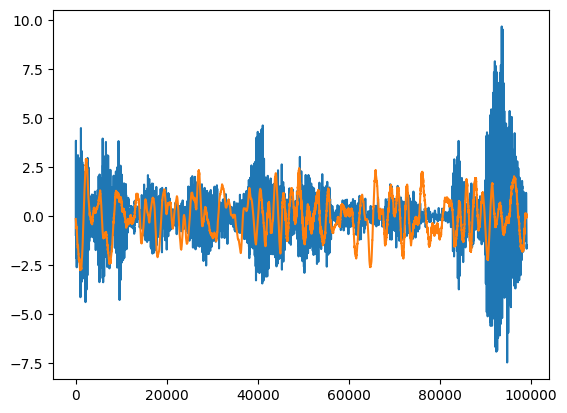

In [141]:
import math
# Plot mono and corrected left on same plot
span = 64000
starting_index = 200000000
multipier = 3
index_delta = 21006 / 2
monoplot = mono_wav[starting_index:starting_index+span]
leftplot = left_wav[starting_index+index_delta:starting_index+span+index_delta]

#delay = math.floor(0.63640625 * 32000)

monoplot = moving_average(monoplot, 1000)
leftplot = moving_average(leftplot, 1000)
monoplot = (monoplot - np.mean(monoplot)) / np.std(monoplot)
leftplot = (leftplot - np.mean(leftplot)) / np.std(leftplot)
import matplotlib.pyplot as plt


# Create a new figure
plt.figure()

# Plot the left_filter
plt.plot(monoplot)
plt.plot(leftplot)

# Show the plot
plt.show()

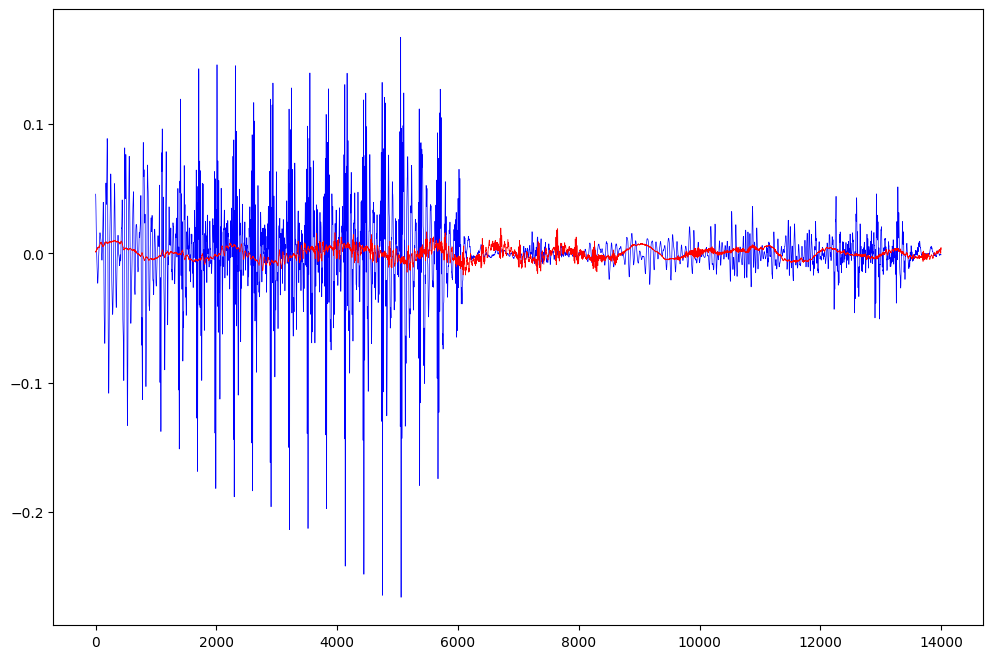

In [173]:
import math
# Plot mono and corrected left on same plot
span = 64000
starting_index = 200000000
multipier = 3
index_delta = 20365 // 2
monoplot = mono_wav[50000+starting_index:starting_index+span]
leftplot = left_wav[50000+starting_index:starting_index+span]

#delay = math.floor(0.63640625 * 32000)

# monoplot = moving_average(monoplot, 10)
# leftplot = moving_average(leftplot, 10)
# monoplot = (monoplot - np.mean(monoplot)) / np.std(monoplot)
# leftplot = (leftplot - np.mean(leftplot)) / np.std(leftplot)
import matplotlib.pyplot as plt


# Create a new figure
plt.figure(figsize=(12, 8))

# Plot the left_filter
plt.plot(monoplot, color='blue',  linewidth=0.5)
plt.plot(leftplot, color='red',  linewidth=0.5)

# Show the plot
plt.show()

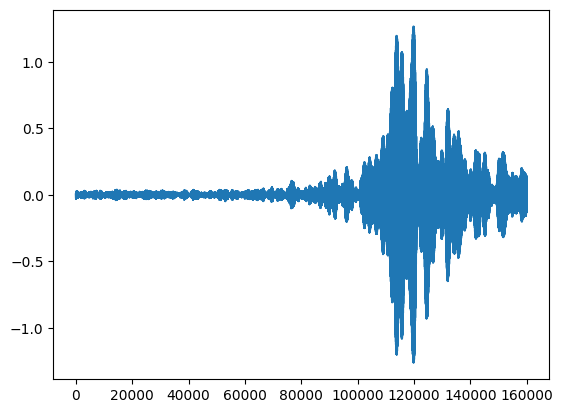

In [34]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure()

# Plot the left_filter
plt.plot(outputarr)

# Show the plot
plt.show()

In [35]:
maxindex = np.argmax(outputarr)
maxindex

119818

In [37]:
delta = maxindex - (target_index - (multipier * matchspan))
delta

-41784182

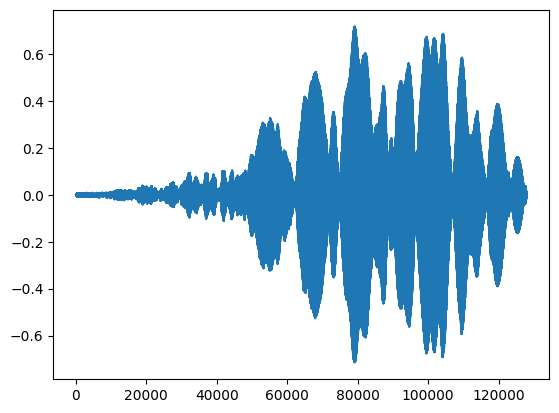

In [6]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure()

# Plot the left_filter
plt.plot(left_filter)

# Show the plot
plt.show()

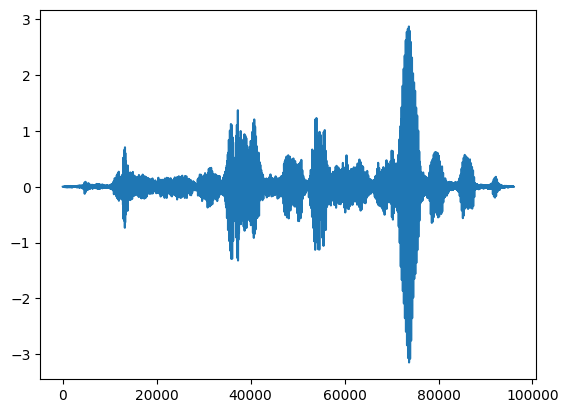

In [30]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure()

# Plot the left_filter
plt.plot(right_filter)

# Show the plot
plt.show()

In [16]:
max(right_filter)

0.0046271547

In [ ]:
for i in right_wav:
    print(i)

In [ ]:
for i in mono_wav:
    print(i)

In [2]:
# Third party shit
import sys
sys.path.append('/workspace/fourth_year_project/Freqency Domain/')
print("Started main")
import torch
import os
import torch.nn as nn
import glob
from torch.utils.tensorboard import SummaryWriter
print("Imported")
# Local imports
from SpectroDataset import SpectroDataset
from Autoencoder import AutoEncoder
from SpectroConverter import SpectroConverter
from WavSplitter import WavSplitter
from SidedSpectroDataset import SidedSpectroDataset
import numpy as np


chkp = '/workspace/extension/unet/left_model_checkpoints2/model_loopnum_0_3_batch_24.pt'

checkpoint = torch.load(chkp)

# Create model
num_channels = 2
left_model = AutoEncoder(input_channels=num_channels, out_channels=num_channels).cuda()

left_model.load_state_dict(checkpoint['model_state_dict'])

left_model.eval()

mono = torch.load('/workspace/extension/unet/freq/mono/mono_700')
left = torch.load('/workspace/extension/unet/freq/left/left_135_700.pt')
label = 135.0

label = torch.tensor(label).cuda()
left = left.cuda()
base_mono = mono.cuda()



Started main
Imported


FileNotFoundError: [Errno 2] No such file or directory: '/workspace/extension/unet/freq/mono/mono_700'

In [ ]:
mono = torch.view_as_real(base_mono)
mono = mono.unsqueeze(0)
mono = mono.permute(0, 3, 1, 2)
angle = torch.tensor(label).unsqueeze(0).cuda()

# print(mono.shape, left.shape)
left_output = left_model(mono, angle)
# print(mono.shape, left_output.shape)
left_output = left_output.squeeze(0)
left_output = left_output.contiguous()
left_output = torch.view_as_complex(left_output)
# print(mono.shape, left_output.shape)
mono = mono.squeeze(0)
mono = mono.contiguous()
# print(mono.shape, left_output.shape)
mono = mono.permute(1, 2, 0)
# print(mono.shape, left_output.shape)
mono = mono.contiguous()
mono = torch.view_as_complex(mono)
#print(mono.shape, left_output.shape)
#print(left_output_stft.shape)
o1 = mono
o2 = left
o3 = left_output

loss = crit(left_output.real, left.real) + crit(left_output.imag, left.imag)
print(angle)
print(loss)


    

: 

In [2]:
output_string = '''
(venv_work) root@3b00c3a66975:/workspace/fourth_year_project/Freqency Domain# python main.py
Started main
Imported
Set words
Made paths
Created output dirs
/workspace/extension/unet/freq/mono
/workspace/extension/unet/freq/left
Done loading chunk
batch 0: 11.376502990722656
batch 1: 8.063102722167969
batch 2: 5.689867973327637
batch 3: 5.615973472595215
batch 4: 5.648484230041504
batch 5: 7.165063858032227
batch 6: 4.211522102355957
batch 7: 4.422369480133057
batch 8: 3.6719188690185547
batch 9: 7.518576145172119
batch 10: 5.722536087036133
batch 11: 3.6462230682373047
batch 12: 3.3602724075317383
batch 13: 4.119626045227051
batch 14: 2.6711864471435547
batch 15: 2.9121851921081543
batch 16: 4.017975807189941
batch 17: 2.7287399768829346
batch 18: 3.454169988632202
batch 19: 4.080512046813965
batch 20: 2.723592758178711
batch 21: 2.3525946140289307
batch 22: 2.4792628288269043
batch 23: 5.183824062347412
batch 24: 2.937601089477539
batch 25: 2.232438087463379
batch 26: 2.136244297027588
batch 27: 5.425253868103027
batch 28: 1.238938331604004
batch 29: 1.4781067371368408
batch 30: 2.418613910675049
batch 31: 2.076814651489258
batch 32: 1.2542489767074585
batch 33: 1.4490302801132202
batch 34: 1.81374192237854
batch 35: 0.9264034032821655
Epoch: 0, Training Loss: 3.8395421869224973, Validation Loss: 0.258548307336039, LR: 0.01
batch 0: 1.0056734085083008
batch 1: 0.8754627704620361
batch 2: 1.0115300416946411
batch 3: 1.9675679206848145
batch 4: 0.9380882978439331
batch 5: 1.5622063875198364
batch 6: 1.0783627033233643
batch 7: 1.127997636795044
batch 8: 0.8590312004089355
batch 9: 0.8694234490394592
batch 10: 0.9325376749038696
batch 11: 0.555148720741272
batch 12: 0.5397474765777588
batch 13: 0.9465664625167847
batch 14: 0.6480776071548462
batch 15: 0.7258738279342651
batch 16: 0.5995396375656128
batch 17: 0.37701255083084106
batch 18: 0.46995219588279724
batch 19: 0.5256330370903015
batch 20: 0.460812509059906
batch 21: 0.6542593240737915
batch 22: 0.4822862148284912
batch 23: 0.92082279920578
batch 24: 0.4355848431587219
batch 25: 0.580775260925293
batch 26: 0.34170472621917725
batch 27: 0.32908785343170166
batch 28: 0.49625253677368164
batch 29: 0.3183579742908478
batch 30: 0.27981841564178467
batch 31: 0.27117735147476196
batch 32: 0.2283962368965149
batch 33: 0.30414479970932007
batch 34: 0.2671898603439331
batch 35: 0.1887519359588623
Epoch: 1, Training Loss: 0.671523768040869, Validation Loss: 0.46035151680310565, LR: 0.01
Test Loss: 0.404044'''

In [3]:
import re



# Regular expression pattern to match 'batch X: Y' where X is any number and Y is the loss value
pattern = r"batch \d+: (\d+\.\d+)"

# Find all matches in the output string
matches = re.findall(pattern, output_string)

# Convert the matches to floats
loss_values = [float(match) for match in matches]

print(loss_values)

[11.376502990722656, 8.063102722167969, 5.689867973327637, 5.615973472595215, 5.648484230041504, 7.165063858032227, 4.211522102355957, 4.422369480133057, 3.6719188690185547, 7.518576145172119, 5.722536087036133, 3.6462230682373047, 3.3602724075317383, 4.119626045227051, 2.6711864471435547, 2.9121851921081543, 4.017975807189941, 2.7287399768829346, 3.454169988632202, 4.080512046813965, 2.723592758178711, 2.3525946140289307, 2.4792628288269043, 5.183824062347412, 2.937601089477539, 2.232438087463379, 2.136244297027588, 5.425253868103027, 1.238938331604004, 1.4781067371368408, 2.418613910675049, 2.076814651489258, 1.2542489767074585, 1.4490302801132202, 1.81374192237854, 0.9264034032821655, 1.0056734085083008, 0.8754627704620361, 1.0115300416946411, 1.9675679206848145, 0.9380882978439331, 1.5622063875198364, 1.0783627033233643, 1.127997636795044, 0.8590312004089355, 0.8694234490394592, 0.9325376749038696, 0.555148720741272, 0.5397474765777588, 0.9465664625167847, 0.6480776071548462, 0.725

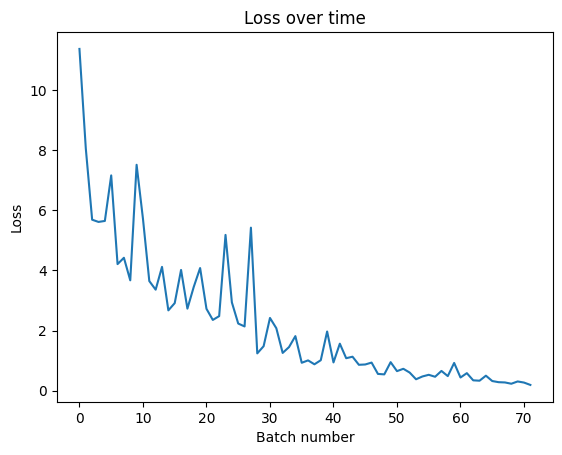

In [5]:
import matplotlib.pyplot as plt
plt.plot(loss_values)
plt.title('Loss of Direct Prediction over time')
plt.xlabel('Batch number')
plt.ylabel('Loss')
plt.show()

In [6]:
output_string = '''
How can I extract the batch values using regular expressions for this string: Epoch: 0/100, Batch: 2/3, Loss: 10.767228126525879
Epoch: 1/100, Batch: 0/3, Loss: 12.494895935058594
Epoch: 1/100, Batch: 1/3, Loss: 11.093255996704102
Epoch: 1/100, Batch: 2/3, Loss: 15.236966133117676
Epoch: 2/100, Batch: 0/3, Loss: 11.697768211364746
Epoch: 2/100, Batch: 1/3, Loss: 10.673439979553223
Epoch: 2/100, Batch: 2/3, Loss: 11.703906059265137
Epoch: 3/100, Batch: 0/3, Loss: 12.112996101379395
Epoch: 3/100, Batch: 1/3, Loss: 11.704055786132812
Epoch: 3/100, Batch: 2/3, Loss: 14.611811637878418
Epoch: 4/100, Batch: 0/3, Loss: 11.125699043273926
Epoch: 4/100, Batch: 1/3, Loss: 11.3292875289917
Epoch: 4/100, Batch: 2/3, Loss: 7.68617582321167
Epoch: 5/100, Batch: 0/3, Loss: 7.655582904815674
Epoch: 5/100, Batch: 1/3, Loss: 11.890690803527832
Epoch: 5/100, Batch: 2/3, Loss: 8.918408393859863
Epoch: 6/100, Batch: 0/3, Loss: 7.666585922241211
Epoch: 6/100, Batch: 1/3, Loss: 7.618369102478027
Epoch: 6/100, Batch: 2/3, Loss: 9.719980239868164
Epoch: 7/100, Batch: 0/3, Loss: 7.155208587646484
Epoch: 7/100, Batch: 1/3, Loss: 10.17029857635498
Epoch: 7/100, Batch: 2/3, Loss: 7.5942912101745605
Epoch: 8/100, Batch: 0/3, Loss: 7.648619651794434
Epoch: 8/100, Batch: 1/3, Loss: 6.062999248504639
Epoch: 8/100, Batch: 2/3, Loss: 6.804390907287598
Epoch: 9/100, Batch: 0/3, Loss: 5.772231101989746
Epoch: 9/100, Batch: 1/3, Loss: 5.937400817871094
Epoch: 9/100, Batch: 2/3, Loss: 5.546474933624268
Epoch: 10/100, Batch: 0/3, Loss: 6.349180221557617
Epoch: 10/100, Batch: 1/3, Loss: 6.521515846252441
Epoch: 10/100, Batch: 2/3, Loss: 5.896491527557373
Epoch: 11/100, Batch: 0/3, Loss: 5.380529880523682
Epoch: 11/100, Batch: 1/3, Loss: 5.494138717651367
Epoch: 11/100, Batch: 2/3, Loss: 5.075983047485352
Epoch: 12/100, Batch: 0/3, Loss: 5.062763214111328
Epoch: 12/100, Batch: 1/3, Loss: 5.12259578704834
Epoch: 12/100, Batch: 2/3, Loss: 4.66713285446167
Epoch: 13/100, Batch: 0/3, Loss: 4.6670989990234375
Epoch: 13/100, Batch: 1/3, Loss: 4.508760929107666
Epoch: 13/100, Batch: 2/3, Loss: 4.970911026000977
Epoch: 14/100, Batch: 0/3, Loss: 4.07971715927124
Epoch: 14/100, Batch: 1/3, Loss: 3.982637882232666
Epoch: 14/100, Batch: 2/3, Loss: 5.531211853027344
Epoch: 15/100, Batch: 0/3, Loss: 5.158339500427246
Epoch: 15/100, Batch: 1/3, Loss: 4.458279132843018
Epoch: 15/100, Batch: 2/3, Loss: 5.716604709625244
Epoch: 16/100, Batch: 0/3, Loss: 5.830364227294922
Epoch: 16/100, Batch: 1/3, Loss: 5.834930896759033
Epoch: 16/100, Batch: 2/3, Loss: 4.7791571617126465
Epoch: 17/100, Batch: 0/3, Loss: 5.76635217666626
Epoch: 17/100, Batch: 1/3, Loss: 5.935281753540039
Epoch: 17/100, Batch: 2/3, Loss: 4.3288726806640625
Epoch: 18/100, Batch: 0/3, Loss: 4.082045078277588
Epoch: 18/100, Batch: 1/3, Loss: 5.439530849456787
Epoch: 18/100, Batch: 2/3, Loss: 4.101370334625244
Epoch: 19/100, Batch: 0/3, Loss: 4.967047691345215
Epoch: 19/100, Batch: 1/3, Loss: 4.439924716949463
Epoch: 19/100, Batch: 2/3, Loss: 4.833127021789551
Epoch: 20/100, Batch: 0/3, Loss: 5.128835201263428
Epoch: 20/100, Batch: 1/3, Loss: 4.876553535461426
Epoch: 20/100, Batch: 2/3, Loss: 4.707076072692871
Epoch: 21/100, Batch: 0/3, Loss: 5.095493793487549
Epoch: 21/100, Batch: 1/3, Loss: 3.9007439613342285
Epoch: 21/100, Batch: 2/3, Loss: 4.602644920349121
Epoch: 22/100, Batch: 0/3, Loss: 4.946238040924072
Epoch: 22/100, Batch: 1/3, Loss: 4.58742094039917
Epoch: 22/100, Batch: 2/3, Loss: 4.496028900146484
Epoch: 23/100, Batch: 0/3, Loss: 3.663616180419922
Epoch: 23/100, Batch: 1/3, Loss: 3.5936882495880127
Epoch: 23/100, Batch: 2/3, Loss: 4.450949668884277
Epoch: 24/100, Batch: 0/3, Loss: 3.5449023246765137
Epoch: 24/100, Batch: 1/3, Loss: 4.338497161865234
Epoch: 24/100, Batch: 2/3, Loss: 4.77164363861084
Epoch: 25/100, Batch: 0/3, Loss: 4.24783992767334
Epoch: 25/100, Batch: 1/3, Loss: 4.195048809051514
Epoch: 25/100, Batch: 2/3, Loss: 4.1625776290893555
Epoch: 26/100, Batch: 0/3, Loss: 3.382539749145508
Epoch: 26/100, Batch: 1/3, Loss: 4.304638862609863
Epoch: 26/100, Batch: 2/3, Loss: 4.718143939971924
Epoch: 27/100, Batch: 0/3, Loss: 3.45621657371521
Epoch: 27/100, Batch: 1/3, Loss: 4.144270420074463
Epoch: 27/100, Batch: 2/3, Loss: 4.554069995880127
Epoch: 28/100, Batch: 0/3, Loss: 4.108030796051025
Epoch: 28/100, Batch: 1/3, Loss: 3.9347622394561768
Epoch: 28/100, Batch: 2/3, Loss: 3.490147113800049
Epoch: 29/100, Batch: 0/3, Loss: 4.802551746368408
Epoch: 29/100, Batch: 1/3, Loss: 3.6768715381622314
Epoch: 29/100, Batch: 2/3, Loss: 3.9624011516571045
Epoch: 30/100, Batch: 0/3, Loss: 3.8936052322387695
Epoch: 30/100, Batch: 1/3, Loss: 3.5375466346740723
Epoch: 30/100, Batch: 2/3, Loss: 4.701423645019531
Epoch: 31/100, Batch: 0/3, Loss: 4.013314723968506
Epoch: 31/100, Batch: 1/3, Loss: 3.2645139694213867
Epoch: 31/100, Batch: 2/3, Loss: 4.9343085289001465
Epoch: 32/100, Batch: 0/3, Loss: 3.9710936546325684
Epoch: 32/100, Batch: 1/3, Loss: 4.30120849609375
Epoch: 32/100, Batch: 2/3, Loss: 4.360217571258545
Epoch: 33/100, Batch: 0/3, Loss: 4.065332889556885
Epoch: 33/100, Batch: 1/3, Loss: 3.202878475189209
Epoch: 33/100, Batch: 2/3, Loss: 3.9928784370422363
Epoch: 34/100, Batch: 0/3, Loss: 3.3477513790130615
Epoch: 34/100, Batch: 1/3, Loss: 3.2421553134918213
Epoch: 34/100, Batch: 2/3, Loss: 4.6915669441223145
Epoch: 35/100, Batch: 0/3, Loss: 3.1086158752441406
Epoch: 35/100, Batch: 1/3, Loss: 3.1423845291137695
Epoch: 35/100, Batch: 2/3, Loss: 2.9431092739105225
Epoch: 36/100, Batch: 0/3, Loss: 3.8337666988372803
Epoch: 36/100, Batch: 1/3, Loss: 3.0696113109588623
Epoch: 36/100, Batch: 2/3, Loss: 2.874260425567627
Epoch: 37/100, Batch: 0/3, Loss: 3.4150540828704834
Epoch: 37/100, Batch: 1/3, Loss: 3.7694456577301025
Epoch: 37/100, Batch: 2/3, Loss: 5.411848068237305
Epoch: 38/100, Batch: 0/3, Loss: 3.5398929119110107
Epoch: 38/100, Batch: 1/3, Loss: 2.8770904541015625
Epoch: 38/100, Batch: 2/3, Loss: 4.276992321014404
Epoch: 39/100, Batch: 0/3, Loss: 3.63289737701416
Epoch: 39/100, Batch: 1/3, Loss: 3.480910539627075
Epoch: 39/100, Batch: 2/3, Loss: 4.352747917175293
Epoch: 40/100, Batch: 0/3, Loss: 3.5138590335845947
Epoch: 40/100, Batch: 1/3, Loss: 2.822824239730835
Epoch: 40/100, Batch: 2/3, Loss: 4.1014509201049805
Epoch: 41/100, Batch: 0/3, Loss: 2.7789931297302246
Epoch: 41/100, Batch: 1/3, Loss: 2.7913949489593506
Epoch: 41/100, Batch: 2/3, Loss: 2.6626174449920654
Epoch: 42/100, Batch: 0/3, Loss: 3.733790397644043
Epoch: 42/100, Batch: 1/3, Loss: 3.532081365585327
Epoch: 42/100, Batch: 2/3, Loss: 4.164515018463135
Epoch: 43/100, Batch: 0/3, Loss: 3.4166152477264404
Epoch: 43/100, Batch: 1/3, Loss: 3.403414487838745
Epoch: 43/100, Batch: 2/3, Loss: 2.811598062515259
Epoch: 44/100, Batch: 0/3, Loss: 2.6748266220092773
Epoch: 44/100, Batch: 1/3, Loss: 2.829957962036133
Epoch: 44/100, Batch: 2/3, Loss: 3.6919052600860596
Epoch: 45/100, Batch: 0/3, Loss: 3.6919686794281006
Epoch: 45/100, Batch: 1/3, Loss: 2.669149875640869
Epoch: 45/100, Batch: 2/3, Loss: 3.617436408996582
Epoch: 46/100, Batch: 0/3, Loss: 2.5924665927886963
Epoch: 46/100, Batch: 1/3, Loss: 5.1679277420043945
Epoch: 46/100, Batch: 2/3, Loss: 3.2660930156707764
Epoch: 47/100, Batch: 0/3, Loss: 2.66007399559021
Epoch: 47/100, Batch: 1/3, Loss: 3.662843942642212
Epoch: 47/100, Batch: 2/3, Loss: 3.392969846725464
Epoch: 48/100, Batch: 0/3, Loss: 3.687408208847046
Epoch: 48/100, Batch: 1/3, Loss: 4.2411088943481445
Epoch: 48/100, Batch: 2/3, Loss: 3.4268980026245117
Epoch: 49/100, Batch: 0/3, Loss: 3.3753905296325684
Epoch: 49/100, Batch: 1/3, Loss: 3.3328211307525635
Epoch: 49/100, Batch: 2/3, Loss: 3.430593729019165
Epoch: 50/100, Batch: 0/3, Loss: 2.712759017944336
Epoch: 50/100, Batch: 1/3, Loss: 3.918370246887207
Epoch: 50/100, Batch: 2/3, Loss: 3.3664753437042236
Epoch: 51/100, Batch: 0/3, Loss: 3.274097442626953
Epoch: 51/100, Batch: 1/3, Loss: 3.424854040145874
Epoch: 51/100, Batch: 2/3, Loss: 3.6107006072998047
Epoch: 52/100, Batch: 0/3, Loss: 3.4467930793762207
Epoch: 52/100, Batch: 1/3, Loss: 2.7909152507781982
Epoch: 52/100, Batch: 2/3, Loss: 3.420267343521118
Epoch: 53/100, Batch: 0/3, Loss: 3.420212507247925
Epoch: 53/100, Batch: 1/3, Loss: 3.3238916397094727
Epoch: 53/100, Batch: 2/3, Loss: 3.4536402225494385
Epoch: 54/100, Batch: 0/3, Loss: 2.563580274581909
Epoch: 54/100, Batch: 1/3, Loss: 2.6120996475219727
Epoch: 54/100, Batch: 2/3, Loss: 3.4407269954681396
Epoch: 55/100, Batch: 0/3, Loss: 2.578537702560425
Epoch: 55/100, Batch: 1/3, Loss: 2.5345091819763184
Epoch: 55/100, Batch: 2/3, Loss: 3.7236344814300537
Epoch: 56/100, Batch: 0/3, Loss: 3.4276816844940186
Epoch: 56/100, Batch: 1/3, Loss: 3.560450792312622
Epoch: 56/100, Batch: 2/3, Loss: 3.2713723182678223
Epoch: 57/100, Batch: 0/3, Loss: 3.2713706493377686
Epoch: 57/100, Batch: 1/3, Loss: 3.3783915042877197
Epoch: 57/100, Batch: 2/3, Loss: 3.504025459289551
Epoch: 58/100, Batch: 0/3, Loss: 3.2289392948150635
Epoch: 58/100, Batch: 1/3, Loss: 3.464151620864868
Epoch: 58/100, Batch: 2/3, Loss: 3.7788126468658447
Epoch: 59/100, Batch: 0/3, Loss: 2.926528215408325
Epoch: 59/100, Batch: 1/3, Loss: 3.26015305519104
Epoch: 59/100, Batch: 2/3, Loss: 3.379756212234497
Epoch: 60/100, Batch: 0/3, Loss: 3.4220614433288574
Epoch: 60/100, Batch: 1/3, Loss: 3.2651426792144775
Epoch: 60/100, Batch: 2/3, Loss: 3.0446109771728516
Epoch: 61/100, Batch: 0/3, Loss: 3.3134384155273438
Epoch: 61/100, Batch: 1/3, Loss: 3.0090019702911377
Epoch: 61/100, Batch: 2/3, Loss: 2.976158380508423
Epoch: 62/100, Batch: 0/3, Loss: 3.130645751953125
Epoch: 62/100, Batch: 1/3, Loss: 3.0617518424987793
Epoch: 62/100, Batch: 2/3, Loss: 2.90653133392334
Epoch: 63/100, Batch: 0/3, Loss: 3.932792901992798
Epoch: 63/100, Batch: 1/3, Loss: 3.0531117916107178
Epoch: 63/100, Batch: 2/3, Loss: 2.8807718753814697
Epoch: 64/100, Batch: 0/3, Loss: 2.8385255336761475
Epoch: 64/100, Batch: 1/3, Loss: 2.660034656524658
Epoch: 64/100, Batch: 2/3, Loss: 2.6329894065856934
Epoch: 65/100, Batch: 0/3, Loss: 2.5851874351501465
Epoch: 65/100, Batch: 1/3, Loss: 2.7555110454559326
Epoch: 65/100, Batch: 2/3, Loss: 3.169004440307617
Epoch: 66/100, Batch: 0/3, Loss: 3.0988705158233643
Epoch: 66/100, Batch: 1/3, Loss: 2.7021868228912354
Epoch: 66/100, Batch: 2/3, Loss: 3.2991220951080322
Epoch: 67/100, Batch: 0/3, Loss: 2.603025436401367
Epoch: 67/100, Batch: 1/3, Loss: 2.5046818256378174
Epoch: 67/100, Batch: 2/3, Loss: 3.1256661415100098
Epoch: 68/100, Batch: 0/3, Loss: 3.803659200668335
Epoch: 68/100, Batch: 1/3, Loss: 2.5303292274475098
Epoch: 68/100, Batch: 2/3, Loss: 2.4670262336730957
Epoch: 69/100, Batch: 0/3, Loss: 4.8784894943237305
Epoch: 69/100, Batch: 1/3, Loss: 3.7774362564086914
Epoch: 69/100, Batch: 2/3, Loss: 3.1172657012939453
Epoch: 70/100, Batch: 0/3, Loss: 3.442699909210205
Epoch: 70/100, Batch: 1/3, Loss: 3.478846311569214
Epoch: 70/100, Batch: 2/3, Loss: 4.635524272918701
Epoch: 71/100, Batch: 0/3, Loss: 4.635458469390869
Epoch: 71/100, Batch: 1/3, Loss: 3.65919828414917
Epoch: 71/100, Batch: 2/3, Loss: 2.5306005477905273
Epoch: 72/100, Batch: 0/3, Loss: 2.9931344985961914
Epoch: 72/100, Batch: 1/3, Loss: 4.278098106384277
Epoch: 72/100, Batch: 2/3, Loss: 3.146590232849121
Epoch: 73/100, Batch: 0/3, Loss: 4.4286274909973145
Epoch: 73/100, Batch: 1/3, Loss: 3.2742433547973633
Epoch: 73/100, Batch: 2/3, Loss: 2.565154790878296
Epoch: 74/100, Batch: 0/3, Loss: 2.662443161010742
Epoch: 74/100, Batch: 1/3, Loss: 2.9556126594543457
Epoch: 74/100, Batch: 2/3, Loss: 3.868399143218994
Epoch: 75/100, Batch: 0/3, Loss: 2.5497982501983643
Epoch: 75/100, Batch: 1/3, Loss: 2.9246439933776855
Epoch: 75/100, Batch: 2/3, Loss: 2.6126370429992676
Epoch: 76/100, Batch: 0/3, Loss: 2.936276912689209
Epoch: 76/100, Batch: 1/3, Loss: 2.565248489379883
Epoch: 76/100, Batch: 2/3, Loss: 3.9070138931274414
Epoch: 77/100, Batch: 0/3, Loss: 3.9070119857788086
Epoch: 77/100, Batch: 1/3, Loss: 2.846679449081421
Epoch: 77/100, Batch: 2/3, Loss: 4.508510112762451
Epoch: 78/100, Batch: 0/3, Loss: 2.552027702331543
Epoch: 78/100, Batch: 1/3, Loss: 2.6412787437438965
Epoch: 78/100, Batch: 2/3, Loss: 2.8970718383789062
Epoch: 79/100, Batch: 0/3, Loss: 3.716923952102661
Epoch: 79/100, Batch: 1/3, Loss: 2.5724754333496094
Epoch: 79/100, Batch: 2/3, Loss: 3.4601404666900635
Epoch: 80/100, Batch: 0/3, Loss: 4.475790500640869
Epoch: 80/100, Batch: 1/3, Loss: 3.4601316452026367
Epoch: 80/100, Batch: 2/3, Loss: 2.4707868099212646
Epoch: 81/100, Batch: 0/3, Loss: 2.437265634536743
Epoch: 81/100, Batch: 1/3, Loss: 2.470097064971924
Epoch: 81/100, Batch: 2/3, Loss: 3.2834813594818115
Epoch: 82/100, Batch: 0/3, Loss: 4.563191890716553
Epoch: 82/100, Batch: 1/3, Loss: 2.6803126335144043
Epoch: 82/100, Batch: 2/3, Loss: 2.424293279647827
Epoch: 83/100, Batch: 0/3, Loss: 3.316518783569336
Epoch: 83/100, Batch: 1/3, Loss: 2.6151163578033447
Epoch: 83/100, Batch: 2/3, Loss: 2.4381980895996094
Epoch: 84/100, Batch: 0/3, Loss: 4.662201404571533
Epoch: 84/100, Batch: 1/3, Loss: 3.572033405303955
Epoch: 84/100, Batch: 2/3, Loss: 3.316183090209961
Epoch: 85/100, Batch: 0/3, Loss: 2.386929512023926
Epoch: 85/100, Batch: 1/3, Loss: 3.1484694480895996
Epoch: 85/100, Batch: 2/3, Loss: 2.637124538421631
Epoch: 86/100, Batch: 0/3, Loss: 2.391230344772339
Epoch: 86/100, Batch: 1/3, Loss: 3.437938690185547
Epoch: 86/100, Batch: 2/3, Loss: 3.000307559967041
Epoch: 87/100, Batch: 0/3, Loss: 3.0100390911102295
Epoch: 87/100, Batch: 1/3, Loss: 2.5578675270080566
Epoch: 87/100, Batch: 2/3, Loss: 3.2493464946746826
Epoch: 88/100, Batch: 0/3, Loss: 3.2986457347869873
Epoch: 88/100, Batch: 1/3, Loss: 4.506281852722168
Epoch: 88/100, Batch: 2/3, Loss: 2.4730629920959473
Epoch: 89/100, Batch: 0/3, Loss: 2.5514838695526123
Epoch: 89/100, Batch: 1/3, Loss: 3.2496063709259033
Epoch: 89/100, Batch: 2/3, Loss: 4.22480583190918
Epoch: 90/100, Batch: 0/3, Loss: 2.4625113010406494
Epoch: 90/100, Batch: 1/3, Loss: 3.210744857788086
Epoch: 90/100, Batch: 2/3, Loss: 2.642178773880005
Epoch: 91/100, Batch: 0/3, Loss: 2.642186403274536
Epoch: 91/100, Batch: 1/3, Loss: 2.4238553047180176
Epoch: 91/100, Batch: 2/3, Loss: 2.54341983795166
Epoch: 92/100, Batch: 0/3, Loss: 3.065821409225464
Epoch: 92/100, Batch: 1/3, Loss: 2.543389081954956
Epoch: 92/100, Batch: 2/3, Loss: 2.586669921875
Epoch: 93/100, Batch: 0/3, Loss: 2.5842249393463135
Epoch: 93/100, Batch: 1/3, Loss: 3.0449531078338623
Epoch: 93/100, Batch: 2/3, Loss: 2.9535043239593506
Epoch: 94/100, Batch: 0/3, Loss: 3.3980331420898438
Epoch: 94/100, Batch: 1/3, Loss: 2.4762120246887207
Epoch: 94/100, Batch: 2/3, Loss: 2.4649367332458496
Epoch: 95/100, Batch: 0/3, Loss: 2.4485409259796143
Epoch: 95/100, Batch: 1/3, Loss: 3.0279035568237305
Epoch: 95/100, Batch: 2/3, Loss: 4.081037521362305
Epoch: 96/100, Batch: 0/3, Loss: 2.5230729579925537
Epoch: 96/100, Batch: 1/3, Loss: 2.316922426223755
Epoch: 96/100, Batch: 2/3, Loss: 2.4096126556396484
Epoch: 97/100, Batch: 0/3, Loss: 2.929109573364258
Epoch: 97/100, Batch: 1/3, Loss: 2.824457883834839
Epoch: 97/100, Batch: 2/3, Loss: 2.4643373489379883
Epoch: 98/100, Batch: 0/3, Loss: 2.286019802093506
Epoch: 98/100, Batch: 1/3, Loss: 2.390732765197754
Epoch: 98/100, Batch: 2/3, Loss: 4.17457914352417
Epoch: 99/100, Batch: 0/3, Loss: 2.336101531982422
Epoch: 99/100, Batch: 1/3, Loss: 2.7703280448913574
Epoch: 99/100, Batch: 2/3, Loss: 2.3406519889831543
'''

In [11]:
import re

# Regular expression pattern to match 'Batch: X/Y' where X is the batch number
pattern = r"Loss: (\d+\.\d+)"

# Find all matches in the output string
matches = re.findall(pattern, output_string)

# Convert the matches to integers
loss_values = [float(match) for match in matches]

print(loss_values)

[10.767228126525879, 12.494895935058594, 11.093255996704102, 15.236966133117676, 11.697768211364746, 10.673439979553223, 11.703906059265137, 12.112996101379395, 11.704055786132812, 14.611811637878418, 11.125699043273926, 11.3292875289917, 7.68617582321167, 7.655582904815674, 11.890690803527832, 8.918408393859863, 7.666585922241211, 7.618369102478027, 9.719980239868164, 7.155208587646484, 10.17029857635498, 7.5942912101745605, 7.648619651794434, 6.062999248504639, 6.804390907287598, 5.772231101989746, 5.937400817871094, 5.546474933624268, 6.349180221557617, 6.521515846252441, 5.896491527557373, 5.380529880523682, 5.494138717651367, 5.075983047485352, 5.062763214111328, 5.12259578704834, 4.66713285446167, 4.6670989990234375, 4.508760929107666, 4.970911026000977, 4.07971715927124, 3.982637882232666, 5.531211853027344, 5.158339500427246, 4.458279132843018, 5.716604709625244, 5.830364227294922, 5.834930896759033, 4.7791571617126465, 5.76635217666626, 5.935281753540039, 4.3288726806640625, 4

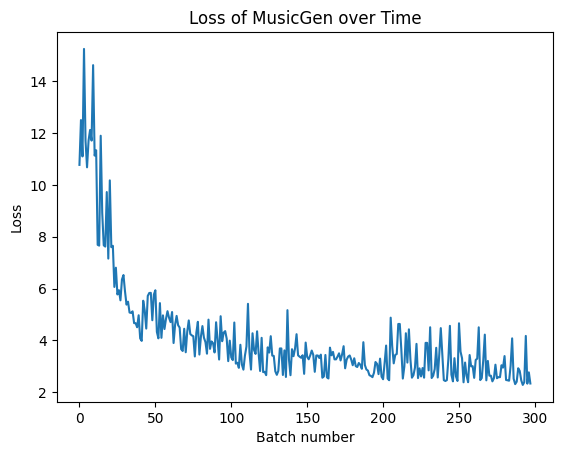

In [13]:
import matplotlib.pyplot as plt
plt.plot(loss_values)
plt.title('Loss of MusicGen over Time')
plt.xlabel('Batch number')
plt.ylabel('Loss')
plt.show()

In [14]:
output_string = '''
(venv_work) root@3b00c3a66975:/workspace/fourth_year_project/Freqency Domain# python main.py
Started main
Imported
Set words
Made paths
Created output dirs
/workspace/extension/unet/freq/mono
/workspace/extension/unet/freq/left
Done loading chunk
Loaded chunk
96 48 16
Train:
        batch 0: 4.27921199798584
        batch 1: 5.221624374389648
        batch 2: 3.6235995292663574
        batch 3: 3.984462022781372
        batch 4: 3.343071460723877
        batch 5: 32.65693283081055
        batch 6: 4.520709037780762
        batch 7: 3.3387506008148193
        batch 8: 1.835024118423462
        batch 9: 3.082019329071045
        batch 10: 2.3112921714782715
        batch 11: 3.515497922897339
Done train
Val:
        val-batch 0: 0.2761250138282776
        val-batch 1: 0.143929123878479
        val-batch 2: 0.6233404278755188
        val-batch 3: 0.05470393970608711
        val-batch 4: 0.052552759647369385
        val-batch 5: 0.09112629294395447
Done val
Epoch: 1, Training Loss: 23.904065132141113, Validation Loss: 0.20696292631328106, LR: 0.01
Train:
        batch 0: 1.9355792999267578
        batch 1: 1.5466034412384033
        batch 2: 2.2914199829101562
        batch 3: 2.3717336654663086
        batch 4: 1.6935561895370483
        batch 5: 1.7874722480773926
        batch 6: 2.3911995887756348
        batch 7: 12.580521583557129
        batch 8: 1.6553919315338135
        batch 9: 1.6855239868164062
        batch 10: 1.9016205072402954
        batch 11: 2.0677342414855957
Done train
Val:
        val-batch 0: 0.2942373752593994
        val-batch 1: 0.6839317679405212
        val-batch 2: 0.05746633559465408
        val-batch 3: 0.12733913958072662
        val-batch 4: 0.06358358263969421
        val-batch 5: 0.0637349784374237
Done val
Epoch: 2, Training Loss: 11.302785555521647, Validation Loss: 0.21504886324206987, LR: 0.01
Train:
        batch 0: 1.6097604036331177
        batch 1: 1.9809174537658691
        batch 2: 1.3486599922180176
        batch 3: 1.5677800178527832
        batch 4: 1.2278492450714111
        batch 5: 1.4659695625305176
        batch 6: 9.402196884155273
        batch 7: 1.8442898988723755
        batch 8: 1.6685057878494263
        batch 9: 1.3043973445892334
        batch 10: 1.4207475185394287
        batch 11: 1.0480592250823975
Done train
Val:
        val-batch 0: 0.24440601468086243
        val-batch 1: 0.21548691391944885
        val-batch 2: 0.2654169201850891
        val-batch 3: 0.5818708539009094
        val-batch 4: 0.7065712213516235
        val-batch 5: 0.23762734234333038
Done val
Epoch: 3, Training Loss: 8.629711111386618, Validation Loss: 0.3752298777302106, LR: 0.01
Train:
        batch 0: 1.2039592266082764
        batch 1: 1.8317070007324219
        batch 2: 0.991671085357666
        batch 3: 1.358249306678772
        batch 4: 1.0543619394302368
        batch 5: 5.774998188018799
        batch 6: 1.257971167564392
        batch 7: 1.1363738775253296
        batch 8: 1.2229044437408447
        batch 9: 1.0708050727844238
        batch 10: 1.0682578086853027
        batch 11: 0.9343165159225464
Done train
Val:
        val-batch 0: 2.0882487297058105
        val-batch 1: 1.0810770988464355
        val-batch 2: 2.7503855228424072
        val-batch 3: 1.0999886989593506
        val-batch 4: 1.1356353759765625
        val-batch 5: 1.101010799407959
Done val
Epoch: 4, Training Loss: 6.30185854434967, Validation Loss: 1.542724370956421, LR: 0.01
Test:
        test-batch 0: 1.576815128326416
        test-batch 1: 1.3057119846343994
Test Loss: 1.441264
Done loading chunk
Loaded chunk
96 48 16
Train:
        batch 0: 0.8359057903289795
        batch 1: 1.2106103897094727
        batch 2: 1.0364265441894531
        batch 3: 0.9445274472236633
        batch 4: 1.3514633178710938
        batch 5: 0.9489094018936157
        batch 6: 0.7667574286460876
        batch 7: 1.075838327407837
        batch 8: 0.9745420217514038
        batch 9: 1.0476700067520142
        batch 10: 0.8022552728652954
        batch 11: 0.815038800239563
Done train
Val:
        val-batch 0: 5.85927677154541
        val-batch 1: 1.8959856033325195
        val-batch 2: 1.4981482028961182
        val-batch 3: 2.0909368991851807
        val-batch 4: 7.926240921020508
        val-batch 5: 2.949228525161743
Done val
Epoch: 1, Training Loss: 3.9366482496261597, Validation Loss: 3.70330282052358, LR: 0.01
Train:
        batch 0: 0.5378479957580566
        batch 1: 0.7328952550888062
        batch 2: 0.5097067356109619
        batch 3: 0.7930293083190918
        batch 4: 0.6984755396842957
        batch 5: 0.9180035591125488
        batch 6: 0.6020276546478271
        batch 7: 0.6406948566436768
        batch 8: 0.6430789828300476
        batch 9: 0.798301637172699
        batch 10: 0.623410165309906
        batch 11: 0.7059071660041809
Done train
Val:
        val-batch 0: 2.6664066314697266
        val-batch 1: 8.4244384765625
        val-batch 2: 3.137859344482422
        val-batch 3: 1.7348616123199463
        val-batch 4: 0.9845656752586365
        val-batch 5: 3.8039908409118652
Done val
Epoch: 2, Training Loss: 2.734459618727366, Validation Loss: 3.4586870968341827, LR: 0.01
Train:
        batch 0: 0.4632839560508728
        batch 1: 0.38969993591308594
        batch 2: 0.6136454939842224
        batch 3: 0.6583986282348633
        batch 4: 0.515759289264679
        batch 5: 0.4884532690048218
        batch 6: 0.7059286832809448
        batch 7: 0.5726925134658813
        batch 8: 0.41708189249038696
        batch 9: 0.46299445629119873
        batch 10: 0.5351487398147583
        batch 11: 0.34774261713027954
Done train
Val:
        val-batch 0: 3.389988422393799
        val-batch 1: 1.385744571685791
        val-batch 2: 1.4042198657989502
        val-batch 3: 5.684673309326172
        val-batch 4: 2.291196346282959
        val-batch 5: 2.5885443687438965
Done val
Epoch: 3, Training Loss: 2.056943158308665, Validation Loss: 2.7907278140385947, LR: 0.01
Train:
        batch 0: 0.5332720875740051
        batch 1: 0.4228566586971283
        batch 2: 0.2721936106681824
        batch 3: 0.3773692846298218
        batch 4: 0.38485217094421387
        batch 5: 0.32094305753707886
        batch 6: 0.3420950770378113
        batch 7: 0.49082356691360474
        batch 8: 0.36225879192352295
        batch 9: 0.4633188545703888
        batch 10: 0.3155052661895752
        batch 11: 0.2851162552833557
Done train
Val:
        val-batch 0: 0.9654686450958252
        val-batch 1: 0.8809645175933838
        val-batch 2: 6.006561279296875
        val-batch 3: 1.6682789325714111
        val-batch 4: 2.2100439071655273
        val-batch 5: 1.0866012573242188
Done val
Epoch: 4, Training Loss: 1.523534893989563, Validation Loss: 2.1363197565078735, LR: 0.01
Test:
        test-batch 0: 1.866657018661499
        test-batch 1: 2.598874092102051
Test Loss: 2.232766
Done loading chunk
Loaded chunk
96 48 16
Train:
        batch 0: 0.5598849654197693
        batch 1: 0.4280851483345032
        batch 2: 0.29705771803855896
        batch 3: 0.26226961612701416
        batch 4: 0.2985572814941406
        batch 5: 0.209774911403656
        batch 6: 0.4452040493488312
        batch 7: 0.3960469961166382
        batch 8: 0.3276657462120056
        batch 9: 0.27330055832862854
        batch 10: 0.4597240686416626
        batch 11: 0.38131624460220337
Done train
Val:
        val-batch 0: 1.6065287590026855
        val-batch 1: 1.1107151508331299
        val-batch 2: 1.7356107234954834
        val-batch 3: 1.7826101779937744
        val-batch 4: 0.8827444911003113
        val-batch 5: 1.7877750396728516
Done val
Epoch: 1, Training Loss: 1.4462957680225372, Validation Loss: 1.4843307236830394, LR: 0.01
Train:
        batch 0: 0.22055339813232422
        batch 1: 0.32437264919281006
        batch 2: 0.3514757752418518
        batch 3: 0.31362390518188477
        batch 4: 0.23356691002845764
        batch 5: 0.2806275486946106
        batch 6: 0.27228978276252747
        batch 7: 0.2119426429271698
        batch 8: 0.2970621585845947
        batch 9: 0.35953882336616516
        batch 10: 0.1844862699508667
        batch 11: 0.38083547353744507
Done train
Val:
        val-batch 0: 1.5733996629714966
        val-batch 1: 0.6938104629516602
        val-batch 2: 1.1734899282455444
        val-batch 3: 0.7947849035263062
        val-batch 4: 1.9056637287139893
        val-batch 5: 0.8733280897140503
Done val
Epoch: 2, Training Loss: 1.1434584458669026, Validation Loss: 1.1690794626871746, LR: 0.01
Train:
        batch 0: 0.17536363005638123
        batch 1: 0.19851811230182648
        batch 2: 0.19819244742393494
        batch 3: 0.22586689889431
        batch 4: 0.22603100538253784
        batch 5: 0.23232775926589966
        batch 6: 0.30438709259033203
        batch 7: 0.21375393867492676
        batch 8: 0.2909030318260193
        batch 9: 0.2064163088798523
        batch 10: 0.22384682297706604
        batch 11: 0.1499166190624237
Done train
Val:
        val-batch 0: 0.3468073010444641
        val-batch 1: 0.5421358346939087
        val-batch 2: 0.8410630822181702
        val-batch 3: 1.4119811058044434
        val-batch 4: 1.174386739730835
        val-batch 5: 1.2604520320892334
Done val
Epoch: 3, Training Loss: 0.88184122244517, Validation Loss: 0.9294710159301758, LR: 0.01
Train:
        batch 0: 0.19126790761947632
        batch 1: 0.31289857625961304
        batch 2: 0.16534191370010376
        batch 3: 0.20569024980068207
        batch 4: 0.18963965773582458
        batch 5: 0.27058133482933044
        batch 6: 0.16123288869857788
        batch 7: 0.13064412772655487
        batch 8: 0.13641047477722168
        batch 9: 0.1710810363292694
        batch 10: 0.1303289830684662
        batch 11: 0.1372431069612503
Done train
Val:
        val-batch 0: 1.1860934495925903
        val-batch 1: 1.0843552350997925
        val-batch 2: 0.9130269289016724
        val-batch 3: 0.6337920427322388
        val-batch 4: 0.6494293808937073
        val-batch 5: 0.5165424346923828
Done val
Epoch: 4, Training Loss: 0.7341200858354568, Validation Loss: 0.8305399119853973, LR: 0.01
Test:
        test-batch 0: 0.7137002944946289
        test-batch 1: 0.5500752925872803
Test Loss: 0.631888
Done loading chunk
Loaded chunk
96 48 16
Train:
        batch 0: 0.2356972098350525
        batch 1: 0.14805184304714203
        batch 2: 0.13324907422065735
        batch 3: 0.14782702922821045
        batch 4: 0.1305028796195984
        batch 5: 0.19035272300243378
        batch 6: 0.14036700129508972
        batch 7: 0.2657466530799866
        batch 8: 0.1341690719127655
        batch 9: 0.07496697455644608
        batch 10: 0.1862964928150177
        batch 11: 0.12129490077495575
Done train
Val:
        val-batch 0: 0.4606204032897949
        val-batch 1: 0.6358685493469238
        val-batch 2: 0.7009375095367432
        val-batch 3: 0.5798008441925049
        val-batch 4: 0.48336464166641235
        val-batch 5: 0.19600042700767517
Done val
Epoch: 1, Training Loss: 0.6361739511291186, Validation Loss: 0.5094320625066757, LR: 0.01
Train:
        batch 0: 0.10289241373538971
        batch 1: 0.10211454331874847
        batch 2: 0.13417840003967285
        batch 3: 0.10074077546596527
        batch 4: 0.09867213666439056
        batch 5: 0.11271075904369354
        batch 6: 0.18751561641693115
        batch 7: 0.15489235520362854
        batch 8: 0.1574660837650299
        batch 9: 0.11809201538562775
        batch 10: 0.061398137360811234
        batch 11: 0.15466174483299255
Done train
Val:
        val-batch 0: 0.43860048055648804
        val-batch 1: 0.5226168632507324
        val-batch 2: 0.25033262372016907
        val-batch 3: 0.3475390672683716
        val-batch 4: 0.56346595287323
        val-batch 5: 0.32668232917785645
Done val
Epoch: 2, Training Loss: 0.4951116604109605, Validation Loss: 0.4082062194744746, LR: 0.01
Train:
        batch 0: 0.09271809458732605
        batch 1: 0.08685903251171112
        batch 2: 0.12531989812850952
        batch 3: 0.10547788441181183
        batch 4: 0.06414791941642761
        batch 5: 0.0973224937915802
        batch 6: 0.07598409801721573
        batch 7: 0.07644282281398773
        batch 8: 0.09839090704917908
        batch 9: 0.11692454665899277
        batch 10: 0.09566322714090347
        batch 11: 0.1731095314025879
Done train
Val:
        val-batch 0: 0.4191620349884033
        val-batch 1: 0.42761051654815674
        val-batch 2: 0.25580018758773804
        val-batch 3: 0.32981643080711365
        val-batch 4: 0.33074796199798584
        val-batch 5: 0.2601556181907654
Done val
Epoch: 3, Training Loss: 0.402786818643411, Validation Loss: 0.3372154583533605, LR: 0.01
Train:
        batch 0: 0.10489194095134735
        batch 1: 0.062206368893384933
        batch 2: 0.09193947166204453
        batch 3: 0.10342693328857422
        batch 4: 0.09393998235464096
        batch 5: 0.09835018217563629
        batch 6: 0.09434199333190918
        batch 7: 0.06747380644083023
        batch 8: 0.09154683351516724
        batch 9: 0.044892311096191406
        batch 10: 0.0751350075006485
        batch 11: 0.08539369702339172
Done train
Val:
        val-batch 0: 0.2904984951019287
        val-batch 1: 0.41201698780059814
        val-batch 2: 0.3859472870826721
        val-batch 3: 0.21866008639335632
        val-batch 4: 0.12138146162033081
        val-batch 5: 0.33179545402526855
Done val
Epoch: 4, Training Loss: 0.33784617607792217, Validation Loss: 0.29338329533735913, LR: 0.01
Test:
        test-batch 0: 0.47079551219940186
        test-batch 1: 0.3079080581665039
Test Loss: 0.389352
Done loading chunk
Loaded chunk
96 48 16
Train:
        batch 0: 0.08807283639907837
        batch 1: 0.06521469354629517
        batch 2: 0.08291038125753403
        batch 3: 0.08555468916893005
        batch 4: 0.06256803125143051
        batch 5: 0.2974581718444824
        batch 6: 0.06603531539440155
        batch 7: 0.09380467236042023
        batch 8: 0.04653523489832878
        batch 9: 0.07164114713668823
        batch 10: 0.05616334080696106
        batch 11: 0.07040925323963165
Done train
Val:
        val-batch 0: 0.38649889826774597
        val-batch 1: 0.29732418060302734
        val-batch 2: 0.21529707312583923
        val-batch 3: 0.21363377571105957
        val-batch 4: 0.06077701598405838
        val-batch 5: 0.4644679129123688
Done val
Epoch: 1, Training Loss: 0.362122589101394, Validation Loss: 0.2729998094340165, LR: 0.01
Train:
        batch 0: 0.2729262113571167
        batch 1: 0.052663080394268036
        batch 2: 0.057220205664634705
        batch 3: 0.05581539869308472
        batch 4: 0.07668498158454895
        batch 5: 0.06938134878873825
        batch 6: 0.046467363834381104
        batch 7: 0.08627130091190338
        batch 8: 0.046809859573841095
        batch 9: 0.0568074956536293
        batch 10: 0.06056622415781021
        batch 11: 0.04244838282465935
Done train
Val:
        val-batch 0: 0.11414040625095367
        val-batch 1: 0.134614959359169
        val-batch 2: 0.21963249146938324
        val-batch 3: 0.3915354907512665
        val-batch 4: 0.23853757977485657
        val-batch 5: 0.23490869998931885
Done val
Epoch: 2, Training Loss: 0.30802061781287193, Validation Loss: 0.22222827126582465, LR: 0.01
Train:
        batch 0: 0.052574723958969116
        batch 1: 0.048768050968647
        batch 2: 0.05494539067149162
        batch 3: 0.03802770748734474
        batch 4: 0.09177165478467941
        batch 5: 0.0422656387090683
        batch 6: 0.05477813631296158
        batch 7: 0.05715441703796387
        batch 8: 0.05010773241519928
        batch 9: 0.04381832107901573
        batch 10: 0.037163496017456055
        batch 11: 0.21132707595825195
Done train
Val:
        val-batch 0: 0.293354332447052
        val-batch 1: 0.31935441493988037
        val-batch 2: 0.14962442219257355
        val-batch 3: 0.14155179262161255
        val-batch 4: 0.15455155074596405
        val-batch 5: 0.11014625430107117
Done val
Epoch: 3, Training Loss: 0.26090078180034953, Validation Loss: 0.19476379454135895, LR: 0.01
Train:
        batch 0: 0.04895147681236267
        batch 1: 0.04223893582820892
        batch 2: 0.03308785706758499
        batch 3: 0.2488611936569214
        batch 4: 0.0326329842209816
        batch 5: 0.032109349966049194
        batch 6: 0.06973226368427277
        batch 7: 0.06146557629108429
        batch 8: 0.03952664136886597
        batch 9: 0.04192274063825607
        batch 10: 0.04199948534369469
        batch 11: 0.03780046105384827
Done train
Val:
        val-batch 0: 0.13044029474258423
        val-batch 1: 0.29217296838760376
        val-batch 2: 0.23761805891990662
        val-batch 3: 0.10861332714557648
        val-batch 4: 0.1658438742160797
        val-batch 5: 0.07996009290218353
Done val
Epoch: 4, Training Loss: 0.2434429886440436, Validation Loss: 0.16910810271898905, LR: 0.01
Test:
        test-batch 0: 0.07227227836847305
        test-batch 1: 0.1451561450958252
Test Loss: 0.108714
Done loading chunk
Loaded chunk
96 48 16
Train:
        batch 0: 0.16241535544395447
        batch 1: 0.02550783008337021
        batch 2: 0.028417646884918213
        batch 3: 0.03167635574936867
        batch 4: 0.07236596941947937
        batch 5: 0.043670542538166046
        batch 6: 0.043363988399505615
        batch 7: 0.09164908528327942
        batch 8: 0.026895776391029358
        batch 9: 0.04373064637184143
        batch 10: 0.03912196308374405
        batch 11: 0.0364762581884861
Done train
Val:
        val-batch 0: 0.14326244592666626
        val-batch 1: 0.15171530842781067
        val-batch 2: 0.23564797639846802
        val-batch 3: 0.11303979158401489
        val-batch 4: 0.09766897559165955
        val-batch 5: 0.03452558070421219
Done val
Epoch: 1, Training Loss: 0.21509713927904764, Validation Loss: 0.12931001310547194, LR: 0.01
Train:
        batch 0: 0.03055574931204319
        batch 1: 0.062922403216362
        batch 2: 0.049152716994285583
        batch 3: 0.027850035578012466
        batch 4: 0.03802833706140518
        batch 5: 0.024176836013793945
        batch 6: 0.03676619380712509
        batch 7: 0.03272934630513191
        batch 8: 0.023916013538837433
        batch 9: 0.07432647049427032
        batch 10: 0.13200831413269043
        batch 11: 0.03959549963474274
Done train
Val:
        val-batch 0: 0.11746764928102493
        val-batch 1: 0.050514303147792816
        val-batch 2: 0.14555829763412476
        val-batch 3: 0.15798620879650116
        val-batch 4: 0.08767295628786087
        val-batch 5: 0.16440030932426453
Done val
Epoch: 2, Training Loss: 0.19067597202956676, Validation Loss: 0.12059995407859485, LR: 0.01
Train:
        batch 0: 0.020833974704146385
        batch 1: 0.033097319304943085
        batch 2: 0.13079741597175598
        batch 3: 0.023819150403141975
        batch 4: 0.03199477866292
        batch 5: 0.025582635775208473
        batch 6: 0.09238144755363464
        batch 7: 0.06053299084305763
        batch 8: 0.02617025002837181
        batch 9: 0.027909258380532265
        batch 10: 0.02550286054611206
        batch 11: 0.03592948615550995
Done train
Val:
        val-batch 0: 0.18902188539505005
        val-batch 1: 0.15914243459701538
        val-batch 2: 0.07345376908779144
        val-batch 3: 0.04949043318629265
        val-batch 4: 0.07338225841522217
        val-batch 5: 0.11856579780578613
Done val
Epoch: 3, Training Loss: 0.17818385610977808, Validation Loss: 0.11050942974785964, LR: 0.01
Train:
        batch 0: 0.022902509197592735
        batch 1: 0.02274029329419136
        batch 2: 0.028045136481523514
        batch 3: 0.027664735913276672
        batch 4: 0.024511419236660004
        batch 5: 0.04133240878582001
        batch 6: 0.059050917625427246
        batch 7: 0.10276095569133759
        batch 8: 0.01619943603873253
        batch 9: 0.02693503350019455
        batch 10: 0.08172564953565598
        batch 11: 0.019646618515253067
Done train
Val:
        val-batch 0: 0.08082439750432968
        val-batch 1: 0.05494849383831024
        val-batch 2: 0.03265770152211189
        val-batch 3: 0.12060809135437012
        val-batch 4: 0.2405972182750702
        val-batch 5: 0.11131066083908081
Done val
Epoch: 4, Training Loss: 0.1578383712718884, Validation Loss: 0.10682442722221215, LR: 0.01
Test:
        test-batch 0: 0.24380812048912048
        test-batch 1: 0.07673865556716919
Test Loss: 0.160273
Done loading chunk
Loaded chunk
96 48 16
Train:
        batch 0: 0.021611273288726807
        batch 1: 0.03423411399126053
        batch 2: 0.024378448724746704
        batch 3: 0.029834255576133728
        batch 4: 0.023717574775218964
        batch 5: 0.0238199383020401
        batch 6: 0.034218043088912964
        batch 7: 0.020610477775335312
        batch 8: 0.02174147590994835
        batch 9: 0.014629307202994823
        batch 10: 0.15104466676712036
        batch 11: 0.021780727431178093
Done train
Val:
        val-batch 0: 0.09894980490207672
        val-batch 1: 0.15471893548965454
        val-batch 2: 0.057133883237838745
        val-batch 3: 0.09721799194812775
        val-batch 4: 0.1773335188627243
        val-batch 5: 0.07092258334159851
Done val
Epoch: 1, Training Loss: 0.14054010094453892, Validation Loss: 0.10937945296367009, LR: 0.01
Train:
        batch 0: 0.02947438322007656
        batch 1: 0.02020246908068657
        batch 2: 0.0312972366809845
        batch 3: 0.15568417310714722
        batch 4: 0.017704494297504425
        batch 5: 0.01702260412275791
        batch 6: 0.01616891473531723
        batch 7: 0.023483943194150925
        batch 8: 0.01901547610759735
        batch 9: 0.027109496295452118
        batch 10: 0.022897612303495407
        batch 11: 0.0132396025583148
Done train
Val:
        val-batch 0: 0.049968328326940536
        val-batch 1: 0.18342819809913635
        val-batch 2: 0.20412226021289825
        val-batch 3: 0.044801488518714905
        val-batch 4: 0.0743638351559639
        val-batch 5: 0.07735458016395569
Done val
Epoch: 2, Training Loss: 0.131100135234495, Validation Loss: 0.1056731150796016, LR: 0.01
Train:
        batch 0: 0.014843064360320568
        batch 1: 0.02968743070960045
        batch 2: 0.01704924926161766
        batch 3: 0.035957034677267075
        batch 4: 0.022709999233484268
        batch 5: 0.010889923200011253
        batch 6: 0.01265016384422779
        batch 7: 0.15328989923000336
        batch 8: 0.016303841024637222
        batch 9: 0.02850986272096634
        batch 10: 0.019660431891679764
        batch 11: 0.018434228375554085
Done train
Val:
        val-batch 0: 0.07531999796628952
        val-batch 1: 0.06117115542292595
        val-batch 2: 0.03637346252799034
        val-batch 3: 0.1792934387922287
        val-batch 4: 0.04356759041547775
        val-batch 5: 0.22261156141757965
Done val
Epoch: 3, Training Loss: 0.12666170950978994, Validation Loss: 0.10305620109041531, LR: 0.01
Train:
        batch 0: 0.017992813140153885
        batch 1: 0.15758854150772095
        batch 2: 0.03283565491437912
        batch 3: 0.018185388296842575
        batch 4: 0.013940153643488884
        batch 5: 0.013820168562233448
        batch 6: 0.019737035036087036
        batch 7: 0.0317486897110939
        batch 8: 0.013809464871883392
        batch 9: 0.012803144752979279
        batch 10: 0.009165158495306969
        batch 11: 0.025853145867586136
Done train
Val:
        val-batch 0: 0.09251454472541809
        val-batch 1: 0.05411674082279205
        val-batch 2: 0.18563783168792725
        val-batch 3: 0.06134216487407684
        val-batch 4: 0.1382979452610016
        val-batch 5: 0.07401615381240845
Done val
Epoch: 4, Training Loss: 0.12249311959991853, Validation Loss: 0.10098756353060405, LR: 0.01
Test:
        test-batch 0: 0.10974439978599548
        test-batch 1: 0.0714447870850563
Test Loss: 0.090595
Done loading chunk
Loaded chunk
96 48 16
Train:
        batch 0: 0.055758439004421234
        batch 1: 0.016197962686419487
        batch 2: 0.03439749777317047
        batch 3: 0.02166585624217987
        batch 4: 0.02736082300543785
        batch 5: 0.1937284767627716
        batch 6: 0.049634113907814026
        batch 7: 0.01877010241150856
        batch 8: 0.05165508762001991
        batch 9: 0.018826637417078018
        batch 10: 0.0576871894299984
        batch 11: 0.012596329674124718
Done train
Val:
        val-batch 0: 0.06155747175216675
        val-batch 1: 0.09982351958751678
        val-batch 2: 0.043377067893743515
        val-batch 3: 0.06380537152290344
        val-batch 4: 0.06435197591781616
        val-batch 5: 0.05546385794878006
Done val
Epoch: 1, Training Loss: 0.18609283864498138, Validation Loss: 0.06472987743715446, LR: 0.01
Train:
        batch 0: 0.058853909373283386
        batch 1: 0.020036078989505768
        batch 2: 0.018677175045013428
        batch 3: 0.025067728012800217
        batch 4: 0.22636862099170685
        batch 5: 0.05655348673462868
        batch 6: 0.051331132650375366
        batch 7: 0.02716270089149475
        batch 8: 0.014896465465426445
        batch 9: 0.014240920543670654
        batch 10: 0.01727297529578209
        batch 11: 0.016638966277241707
Done train
Val:
        val-batch 0: 0.05649462342262268
        val-batch 1: 0.05882934108376503
        val-batch 2: 0.046996235847473145
        val-batch 3: 0.0692673921585083
        val-batch 4: 0.054705001413822174
        val-batch 5: 0.09395477920770645
Done val
Epoch: 2, Training Loss: 0.18236672009030977, Validation Loss: 0.06337456218898296, LR: 0.01
Train:
        batch 0: 0.07649286091327667
        batch 1: 0.03258977457880974
        batch 2: 0.04835590720176697
        batch 3: 0.030154479667544365
        batch 4: 0.1951124370098114
        batch 5: 0.020482635125517845
        batch 6: 0.01016585435718298
        batch 7: 0.026736177504062653
        batch 8: 0.010617552325129509
        batch 9: 0.058407094329595566
        batch 10: 0.014570849016308784
        batch 11: 0.011810928583145142
Done train
Val:
        val-batch 0: 0.06526149809360504
        val-batch 1: 0.03826695680618286
        val-batch 2: 0.050766151398420334
        val-batch 3: 0.05985923111438751
        val-batch 4: 0.05895629897713661
        val-batch 5: 0.093521349132061
Done val
Epoch: 3, Training Loss: 0.17849885020405054, Validation Loss: 0.06110524758696556, LR: 0.01
Train:
        batch 0: 0.04029075801372528
        batch 1: 0.021979529410600662
        batch 2: 0.0157275702804327
        batch 3: 0.03720642253756523
        batch 4: 0.23030905425548553
        batch 5: 0.01719338446855545
        batch 6: 0.02647135592997074
        batch 7: 0.015180744230747223
        batch 8: 0.023145627230405807
        batch 9: 0.04653790965676308
        batch 10: 0.012173155322670937
        batch 11: 0.04431683570146561
Done train
Val:
        val-batch 0: 0.03254788741469383
        val-batch 1: 0.044244058430194855
        val-batch 2: 0.05464336276054382
        val-batch 3: 0.0562923327088356
        val-batch 4: 0.11653675138950348
        val-batch 5: 0.05548972636461258
Done val
Epoch: 4, Training Loss: 0.17684411567946276, Validation Loss: 0.0599590198447307, LR: 0.01
Test:
        test-batch 0: 0.03556505963206291
        test-batch 1: 0.42717596888542175
Test Loss: 0.231371
Done loading chunk
Loaded chunk
96 48 16
Train:
        batch 0: 0.01674826443195343
        batch 1: 0.02008616179227829
        batch 2: 0.01624784804880619
        batch 3: 0.05593268200755119
        batch 4: 0.06767219305038452
        batch 5: 0.014202553778886795
        batch 6: 0.039475277066230774
        batch 7: 0.015377922914922237
        batch 8: 0.02283381298184395
        batch 9: 0.05393225699663162
        batch 10: 0.007498565129935741
        batch 11: 0.012076870538294315
Done train
Val:
        val-batch 0: 0.033386535942554474
        val-batch 1: 0.13162493705749512
        val-batch 2: 0.23047132790088654
        val-batch 3: 0.05508078634738922
        val-batch 4: 0.17289794981479645
        val-batch 5: 0.2806832492351532
Done val
Epoch: 1, Training Loss: 0.11402813624590635, Validation Loss: 0.15069079771637917, LR: 0.01
Train:
        batch 0: 0.023763228207826614
        batch 1: 0.00958411768078804
        batch 2: 0.054228559136390686
        batch 3: 0.04920869320631027
        batch 4: 0.06637226790189743
        batch 5: 0.012631353922188282
        batch 6: 0.01181771233677864
        batch 7: 0.014795131981372833
        batch 8: 0.018333707004785538
        batch 9: 0.011079998686909676
        batch 10: 0.01617242768406868
        batch 11: 0.05104237049818039
Done train
Val:
        val-batch 0: 0.04468629136681557
        val-batch 1: 0.05022760480642319
        val-batch 2: 0.23526456952095032
        val-batch 3: 0.18412131071090698
        val-batch 4: 0.04355298727750778
        val-batch 5: 0.3173551559448242
Done val
Epoch: 2, Training Loss: 0.11300985608249903, Validation Loss: 0.14586798660457134, LR: 0.01
Train:
        batch 0: 0.039968475699424744
        batch 1: 0.019553693011403084
        batch 2: 0.016030695289373398
        batch 3: 0.02995222434401512
        batch 4: 0.03454062342643738
        batch 5: 0.012682926841080189
        batch 6: 0.010448179207742214
        batch 7: 0.07177311182022095
        batch 8: 0.012193748727440834
        batch 9: 0.05283568799495697
        batch 10: 0.014492406509816647
        batch 11: 0.0190768800675869
Done train
Val:
        val-batch 0: 0.2232087254524231
        val-batch 1: 0.29854321479797363
        val-batch 2: 0.03232600912451744
        val-batch 3: 0.06487566232681274
        val-batch 4: 0.031506702303886414
        val-batch 5: 0.21835121512413025
Done val
Epoch: 3, Training Loss: 0.11118288431316614, Validation Loss: 0.14480192152162394, LR: 0.01
Train:
        batch 0: 0.02525627613067627
        batch 1: 0.01168209221214056
        batch 2: 0.05185643583536148
        batch 3: 0.037523217499256134
        batch 4: 0.013755288906395435
        batch 5: 0.048305775970220566
        batch 6: 0.012939225882291794
        batch 7: 0.017539743334054947
        batch 8: 0.04329025000333786
        batch 9: 0.020122479647397995
        batch 10: 0.037450358271598816
        batch 11: 0.010636246763169765
Done train
Val:
        val-batch 0: 0.043807219713926315
        val-batch 1: 0.2694683074951172
        val-batch 2: 0.15315541625022888
        val-batch 3: 0.13211199641227722
        val-batch 4: 0.11822335422039032
        val-batch 5: 0.13222724199295044
Done val
Epoch: 4, Training Loss: 0.11011913015196721, Validation Loss: 0.14149892268081507, LR: 0.01
Test:
        test-batch 0: 0.33998382091522217
        test-batch 1: 0.06514161825180054
Test Loss: 0.202563
Done loading chunk
Loaded chunk
96 48 16
Train:
        batch 0: 0.04272688180208206
        batch 1: 0.011422539129853249
        batch 2: 0.016431424766778946
        batch 3: 0.032168567180633545
        batch 4: 0.02766628935933113
        batch 5: 0.016250483691692352
        batch 6: 0.017351288348436356
        batch 7: 0.0185454823076725
        batch 8: 0.019086726009845734
        batch 9: 0.027194103226065636
        batch 10: 0.012737543322145939
        batch 11: 0.01632099598646164
Done train
Val:
        val-batch 0: 0.057125166058540344
        val-batch 1: 0.07421879470348358
        val-batch 2: 0.2286505401134491
        val-batch 3: 0.5602022409439087
        val-batch 4: 0.1087689995765686
        val-batch 5: 0.2935471534729004
Done val
Epoch: 1, Training Loss: 0.08596744171033303, Validation Loss: 0.22041881581147513, LR: 0.01
Train:
        batch 0: 0.026842288672924042
        batch 1: 0.03994901105761528
        batch 2: 0.009855525568127632
        batch 3: 0.018184876069426537
        batch 4: 0.01205947995185852
        batch 5: 0.024454981088638306
        batch 6: 0.006025401409715414
        batch 7: 0.014390707015991211
        batch 8: 0.020182235166430473
        batch 9: 0.010511287488043308
        batch 10: 0.025407008826732635
        batch 11: 0.04590875282883644
Done train
Val:
        val-batch 0: 0.1816997081041336
        val-batch 1: 0.05384272336959839
        val-batch 2: 0.08590997010469437
        val-batch 3: 0.23737506568431854
        val-batch 4: 0.18801596760749817
        val-batch 5: 0.5728502869606018
Done val
Epoch: 2, Training Loss: 0.0845905183814466, Validation Loss: 0.21994895363847414, LR: 0.01
Train:
        batch 0: 0.013544406741857529
        batch 1: 0.01236950047314167
        batch 2: 0.02657550759613514
        batch 3: 0.010527001693844795
        batch 4: 0.012490134686231613
        batch 5: 0.04180188104510307
        batch 6: 0.029472501948475838
        batch 7: 0.036974020302295685
        batch 8: 0.02083788812160492
        batch 9: 0.014088192954659462
        batch 10: 0.011235645040869713
        batch 11: 0.02178172580897808
Done train
Val:
        val-batch 0: 0.5892806053161621
        val-batch 1: 0.0752115249633789
        val-batch 2: 0.044063910841941833
        val-batch 3: 0.36261966824531555
        val-batch 4: 0.15030422806739807
        val-batch 5: 0.09426817297935486
Done val
Epoch: 3, Training Loss: 0.08389946880439918, Validation Loss: 0.2192913517355919, LR: 0.01
Train:
        batch 0: 0.012254485860466957
        batch 1: 0.015076007694005966
        batch 2: 0.026195194572210312
        batch 3: 0.037592627108097076
        batch 4: 0.026112014427781105
        batch 5: 0.025532633066177368
        batch 6: 0.030641470104455948
        batch 7: 0.010097645223140717
        batch 8: 0.014231149107217789
        batch 9: 0.01248023472726345
        batch 10: 0.010283460840582848
        batch 11: 0.027561049908399582
Done train
Val:
        val-batch 0: 0.03813420981168747
        val-batch 1: 0.07679320871829987
        val-batch 2: 0.07326558232307434
        val-batch 3: 0.18606281280517578
        val-batch 4: 0.3136288523674011
        val-batch 5: 0.6253758668899536
Done val
Epoch: 4, Training Loss: 0.08268599087993304, Validation Loss: 0.21887675548593202, LR: 0.01
Test:
        test-batch 0: 0.08235122263431549
        test-batch 1: 0.1278059035539627
Test Loss: 0.105079
'''

In [15]:
# Regular expression patterns to match 'batch X: Y', 'val-batch X: Y', and 'test-batch X: Y' where X is any number and Y is the loss value
train_pattern = r"batch \d+: (\d+\.\d+)"
val_pattern = r"val-batch \d+: (\d+\.\d+)"
test_pattern = r"test-batch \d+: (\d+\.\d+)"

# Find all matches in the output string
train_matches = re.findall(train_pattern, output_string)
val_matches = re.findall(val_pattern, output_string)
test_matches = re.findall(test_pattern, output_string)

# Convert the matches to floats
train_loss_values = [float(match) for match in train_matches]
val_loss_values = [float(match) for match in val_matches]
test_loss_values = [float(match) for match in test_matches]

print("Train Loss Values:", train_loss_values)
print("Validation Loss Values:", val_loss_values)
print("Test Loss Values:", test_loss_values)

Train Loss Values: [4.27921199798584, 5.221624374389648, 3.6235995292663574, 3.984462022781372, 3.343071460723877, 32.65693283081055, 4.520709037780762, 3.3387506008148193, 1.835024118423462, 3.082019329071045, 2.3112921714782715, 3.515497922897339, 0.2761250138282776, 0.143929123878479, 0.6233404278755188, 0.05470393970608711, 0.052552759647369385, 0.09112629294395447, 1.9355792999267578, 1.5466034412384033, 2.2914199829101562, 2.3717336654663086, 1.6935561895370483, 1.7874722480773926, 2.3911995887756348, 12.580521583557129, 1.6553919315338135, 1.6855239868164062, 1.9016205072402954, 2.0677342414855957, 0.2942373752593994, 0.6839317679405212, 0.05746633559465408, 0.12733913958072662, 0.06358358263969421, 0.0637349784374237, 1.6097604036331177, 1.9809174537658691, 1.3486599922180176, 1.5677800178527832, 1.2278492450714111, 1.4659695625305176, 9.402196884155273, 1.8442898988723755, 1.6685057878494263, 1.3043973445892334, 1.4207475185394287, 1.0480592250823975, 0.24440601468086243, 0.21

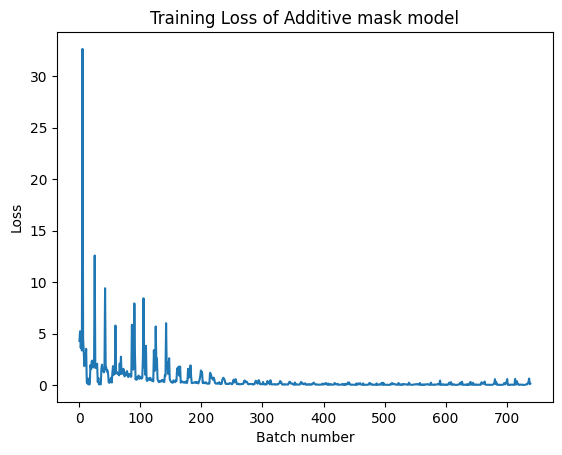

In [25]:
plt.plot(train_loss_values)
plt.title('Training Loss of Additive mask model')
plt.xlabel('Batch number')
plt.ylabel('Loss')
plt.show()

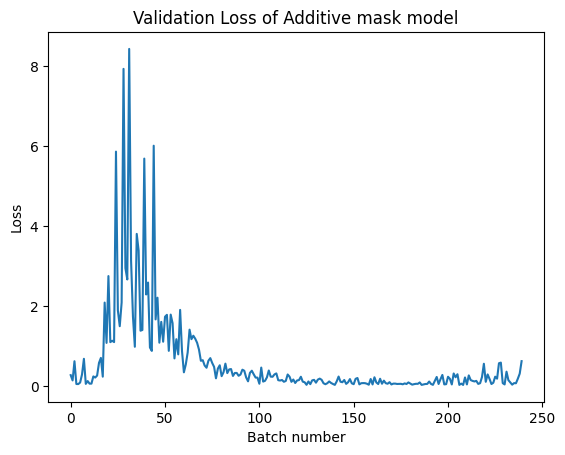

In [24]:
plt.plot(val_loss_values)
plt.title('Validation Loss of Additive mask model')
plt.xlabel('Batch number')
plt.ylabel('Loss')
plt.show()